# Time Series Analysis Machine Learning Project
# IBM Stock Price Time Series Analysis
## By: Denis O'Byrne
## Date: 08/09/2022

# Required
## Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

# Sections required in your report:

## Main objective of the analysis that also specifies whether your model will be focused on a specific type of Time Series, Survival Anlaysis, or Deep Learning and the benefits that your analysis brings to the business or stakeholders of this data.

## Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

## Brief summary of data exploration and actions taken for data cleaning or feature engineering.

## Summary of training at least three variations of the Time Series, Survival Analysis, or Deep Learning model you selected. For example, you can use different models or different hyperparameters.

## A paragraph explaining which of your models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

## Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

## Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

# For this project I will be analyzing the IBM Stock price to build a forcasting model that will predict future stock prices.

# The Data Set

## I will be working with Yahoo Finance daily stock data on the IBM stock price over the past 5 years (8/10/2022 to 8/9/2022)

## Yahoo Finance willl provide the Open and Close price for each stock on each trading day, along with other metrics, but for my analysis I will be monitoring the close price of the stock. I know python can provide this data by connecting to Yahoo with the yfinance package but I downloaded the data from the website instead:
# [Yahoo Finance IBM Data from 8/10/2022 to 8/9/2022](https://finance.yahoo.com/quote/IBM/history?period1=1502323200&period2=1660089600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

In [1]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import fbprophet
import pmdarima as pm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.metrics import mean_squared_error

In [2]:
IBM = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/Stocks/IBM.csv", index_col = 'Date')

In [3]:
IBM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-10,135.411087,136.156784,135.019119,135.602295,106.904755,4733568
2017-08-11,136.185471,136.319305,135.296371,135.602295,106.904755,3142184
2017-08-14,135.755264,136.481842,135.697891,136.061188,107.266525,2352036
2017-08-15,136.281067,137.036331,134.397705,135.822174,107.078117,4896849
2017-08-16,135.554489,136.625244,135.382416,136.233276,107.402199,3439039
...,...,...,...,...,...,...
2022-08-03,131.820007,132.860001,131.320007,132.339996,130.693359,3088500
2022-08-04,132.149994,132.289993,131.020004,131.639999,130.002060,3179800
2022-08-05,131.250000,132.669998,131.070007,132.479996,130.831604,2585000


# For this analysis, I will only be looking at the Close column. 

## Lets look at the closing price over time

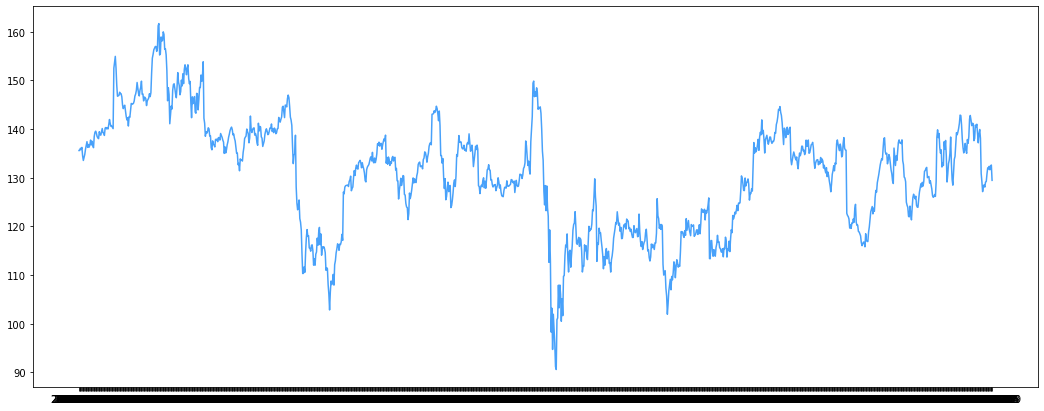

In [4]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(IBM['Close'], c='#48A1FA')
plt.show()

# Before we analyze we should split the data so that we only base our assumptions on past values. I will be predicting on data from July and August 2022, so I will split the data at the date 07/01/2022

In [5]:
split_date = '2022-07-01'
train_data = IBM[:split_date]
test_data  = IBM[split_date:]

In [6]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,141.000000,141.669998,139.259995,141.119995,139.364105,4011900
2022-07-05,139.970001,139.970001,135.270004,137.619995,135.907654,6273400
2022-07-06,138.000000,139.139999,137.130005,138.080002,136.361938,3237000
2022-07-07,138.910004,141.320007,138.830002,140.830002,139.077713,3897100
2022-07-08,140.759995,141.320007,139.820007,140.470001,138.722198,2820800
2022-07-11,140.619995,141.869995,140.130005,141.000000,139.245605,3904700
2022-07-12,140.839996,141.550003,138.570007,139.179993,137.448242,3235400
2022-07-13,137.179993,138.899994,136.800003,137.179993,135.473129,4123200
2022-07-14,135.600006,139.429993,135.020004,139.059998,137.329742,5298400


In [7]:
train_data.shape

(1232, 6)

# Using Seasonal Decompose to see if the data can be decomposed into a stationary series of residuals for predictions. I will be using different choices of Season lenghts (in number of days) to get an idea of the appropriate seaon length for decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=train_data['Close'], model='multiplicative', period=252)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

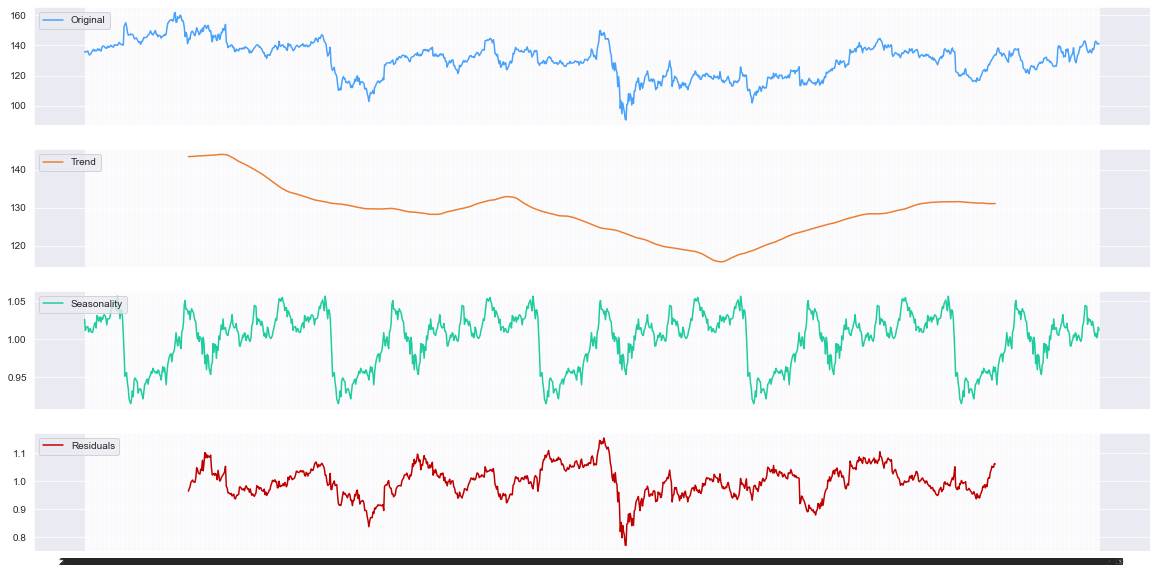

In [9]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(train_data['Close'], label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

In [10]:
ss_decomposition = seasonal_decompose(x=train_data['Close'], model='multiplicative', period=10)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

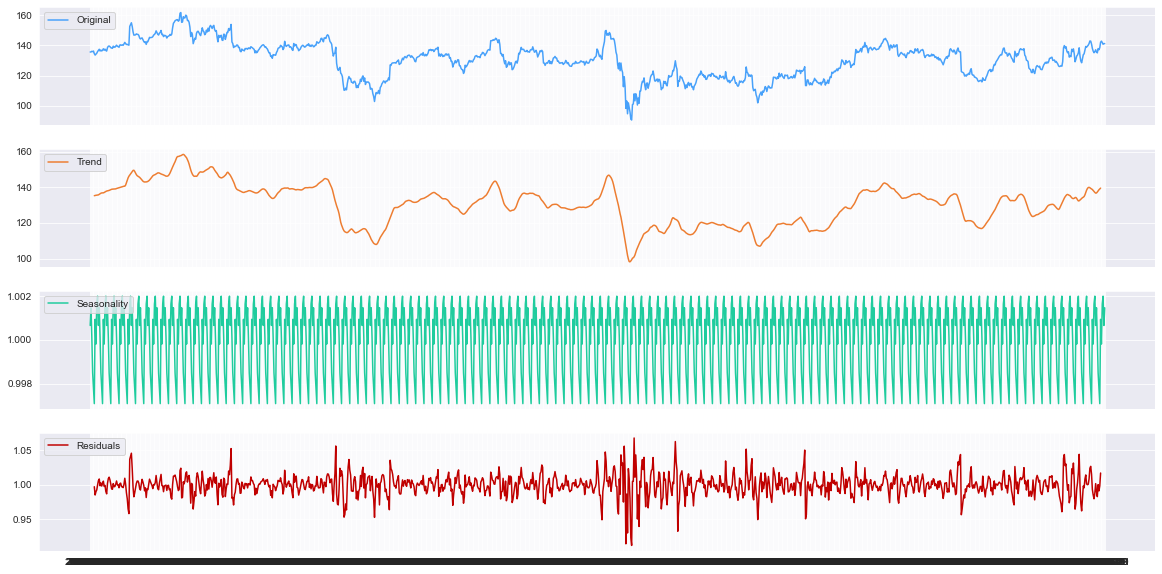

In [11]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(train_data['Close'], label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

In [12]:
ss_decomposition = seasonal_decompose(x=train_data['Close'], model='multiplicative', period=20)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

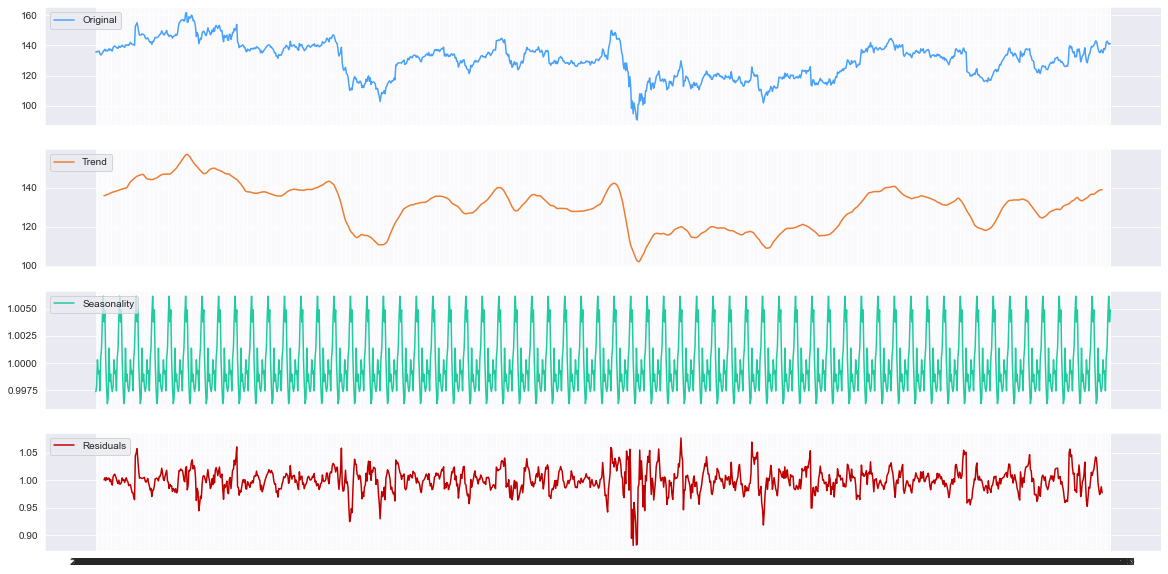

In [13]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(train_data['Close'], label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

In [14]:
ss_decomposition = seasonal_decompose(x=train_data['Close'], model='multiplicative', period=60)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

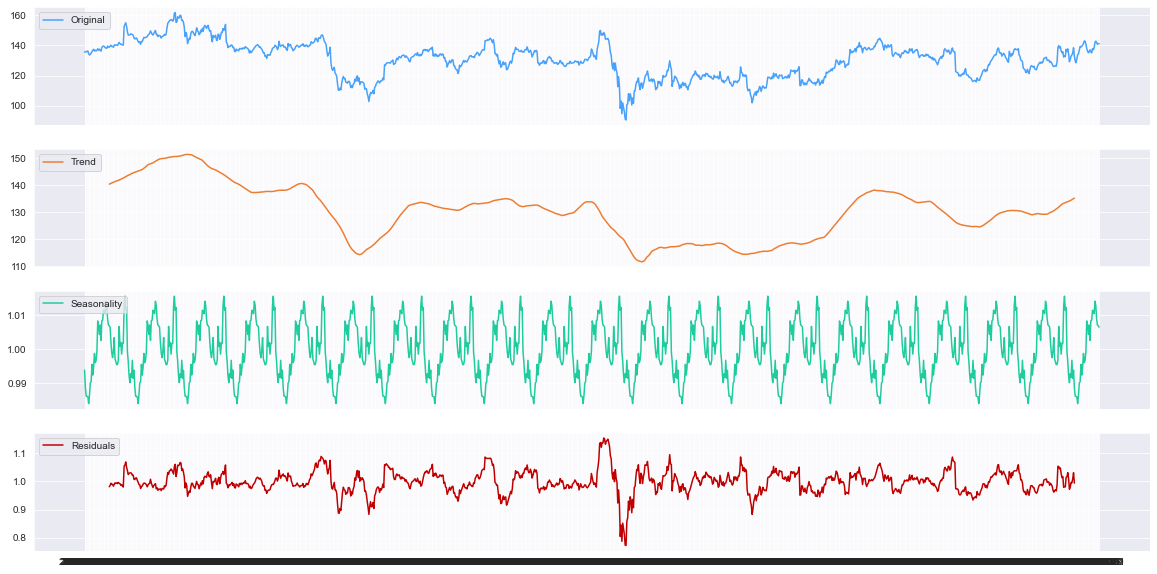

In [15]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(train_data['Close'], label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

# We find that Seasonality does exist but there is no specific trend, the mean of the closing prices seems to be stationary

## It appears that using a monthly (20 buisness days = 4 full buisness weeks) window for seasonality produces stationary residuals.

# To model the trend we can use a rolling window with a window size of 20 to look at the moving average

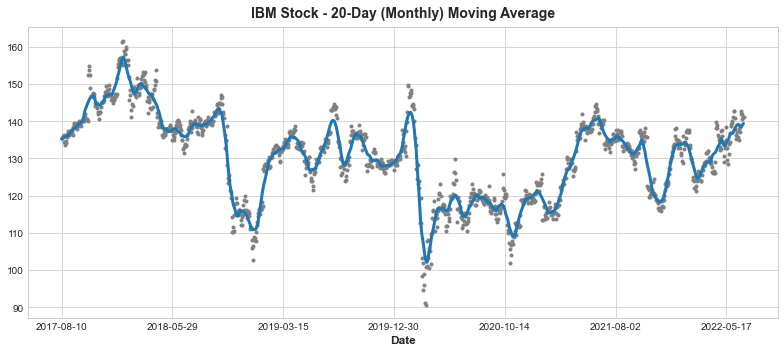

In [322]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
moving_average = train_data['Close'].rolling(window = 20, min_periods = 5, center = True).mean()
ax = train_data['Close'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="IBM Stock - 20-Day (Monthly) Moving Average", legend=False,
);

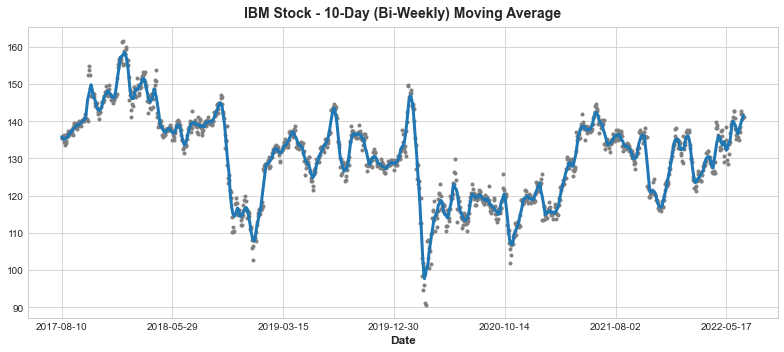

In [323]:
moving_average = train_data['Close'].rolling(window = 10, min_periods = 5, center = True).mean()
ax = train_data['Close'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="IBM Stock - 10-Day (Bi-Weekly) Moving Average", legend=False,
);

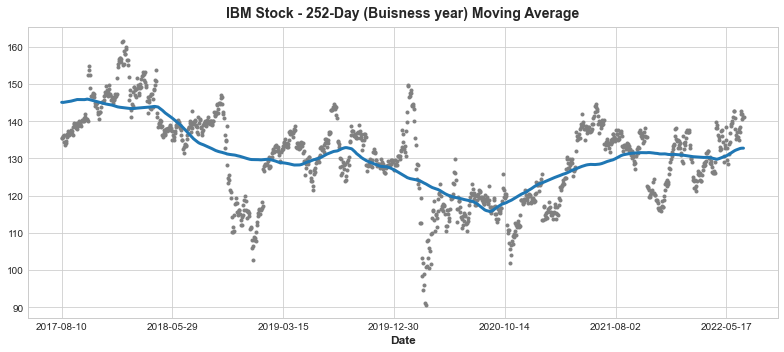

In [324]:
moving_average = train_data['Close'].rolling(window = 252, min_periods = 5, center = True).mean()
ax = train_data['Close'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="IBM Stock - 252-Day (Buisness year) Moving Average", legend=False,
);

# We can also look at the moving standard deviation

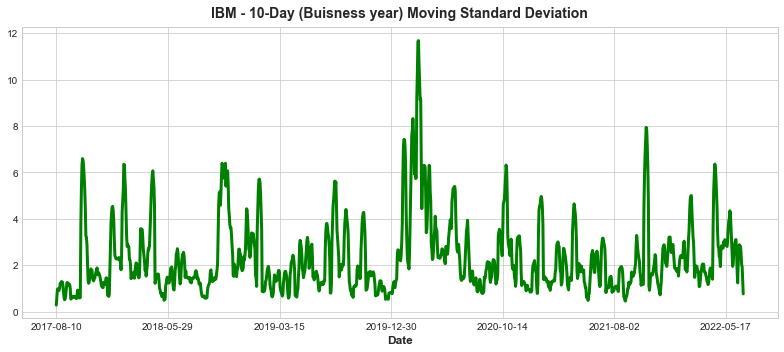

In [19]:
moving_stdv = train_data['Close'].rolling(window = 10, min_periods = 5, center = True).std()
ax =moving_stdv.plot(color="Green", linewidth=3, title="IBM - 10-Day (Buisness year) Moving Standard Deviation", legend=False,)


# Standard deviation appears to be stationary, but the start of Covid was a peak in volatility

# AutoCorrelation Plot

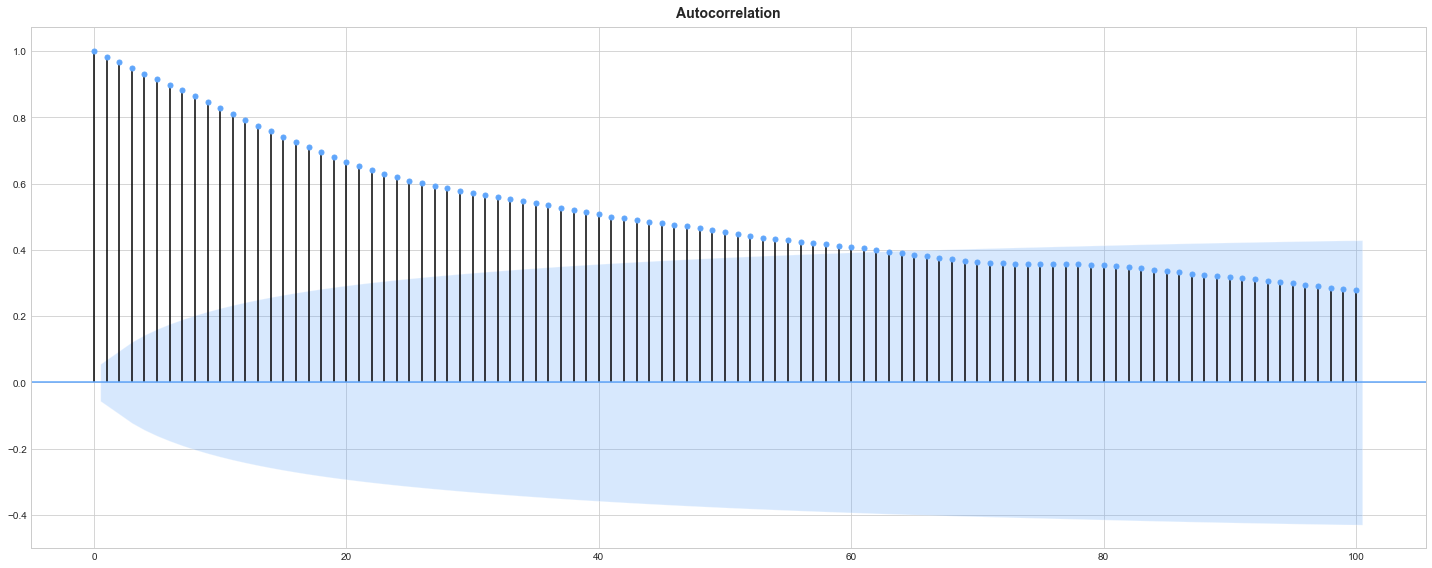

In [20]:
from statsmodels.graphics.tsaplots import acf, plot_acf
ac_values = acf(train_data['Close'],  fft=False, nlags = 60)

from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(train_data['Close'], ax=ax, 
         color='#60A6FB',  
         vlines_kwargs={"colors": '#000000'},
        lags = 100)

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#60A6FB')

plt.show()

# Partial Auto Correlation Plot

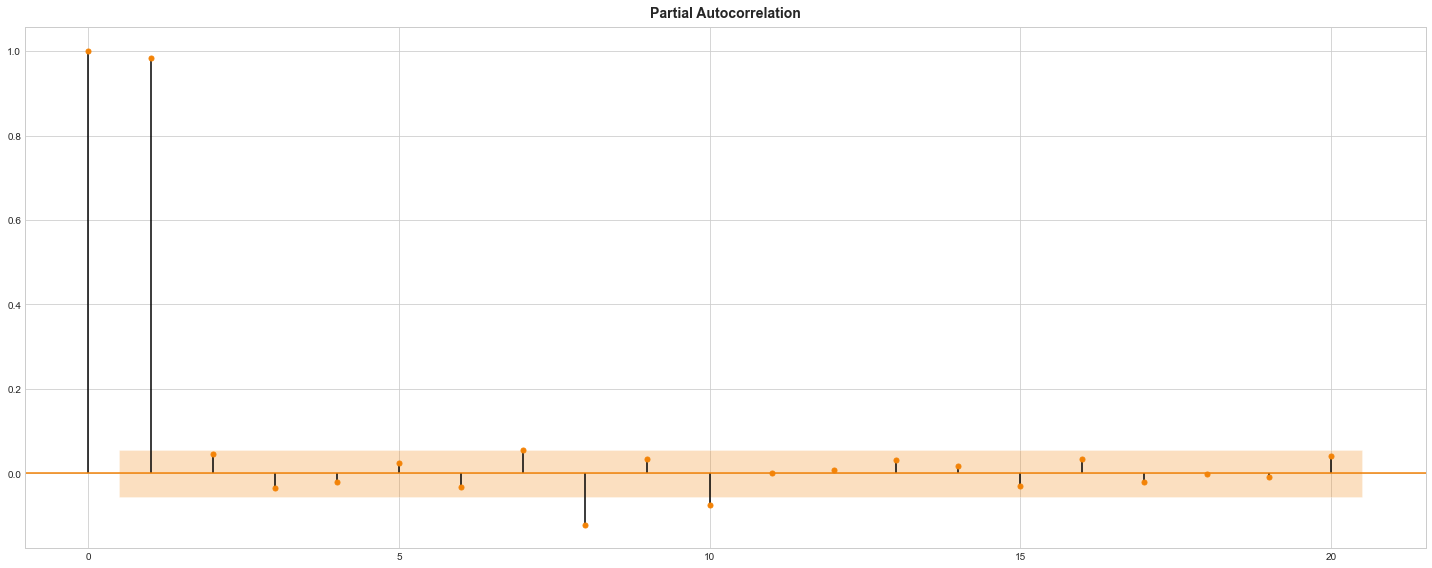

In [21]:
from statsmodels.graphics.tsaplots import pacf, plot_pacf

pacf_values = pacf(train_data['Close'], nlags=20)

fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(train_data['Close'], 
          lags=20, ax=ax, color='#F38307',  
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()

# Our PACF plot indicates that the majority of correlation can be explained by correlation to lag 1 series indicating we have an AR1 series

# Exponentially Weighted Moving Average Smoothing

## Pandas used to have a built in EWMA function, but it has since been removed, so I will rebuild it here

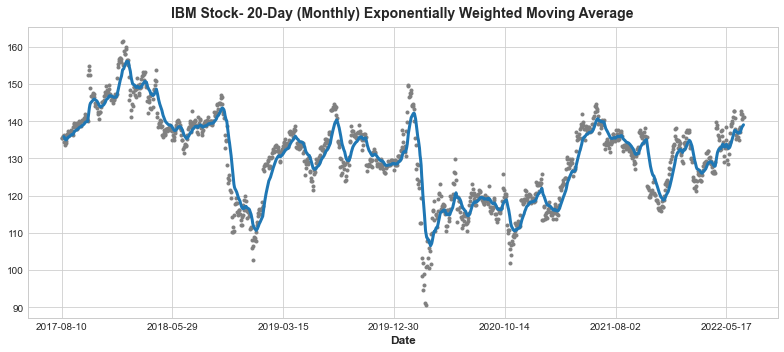

In [22]:
train_ewma = train_data['Close'].ewm(span = 20, min_periods = 5).mean()
ax = train_data['Close'].plot(style=".", color="0.5")
train_ewma.plot(
    ax=ax, linewidth=3, title="IBM Stock- 20-Day (Monthly) Exponentially Weighted Moving Average", legend=False,
);

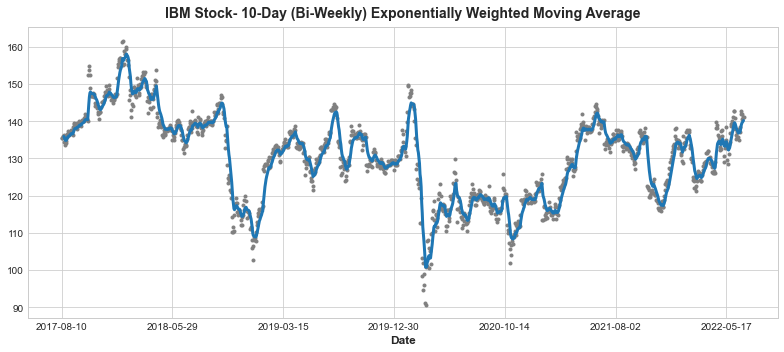

In [23]:
train_ewma = train_data['Close'].ewm(span = 10, min_periods = 5).mean()
ax = train_data['Close'].plot(style=".", color="0.5")
train_ewma.plot(
    ax=ax, linewidth=3, title="IBM Stock- 10-Day (Bi-Weekly) Exponentially Weighted Moving Average", legend=False,
);

## For exponentially weighted moving average, 10 day span performs noticeably better

# Forecasting using smoothing

In [24]:
from statsmodels.tsa.api import SimpleExpSmoothing
single = SimpleExpSmoothing(train_data['Close']).fit(optimized=True)
single_preds = single.forecast(len(test_data['Close']))
single_preds = single_preds.to_list()

#single_mse = mse(test, single_preds)


# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test_data['Close'], 
              'Predictions' : single_preds}).head(10))


C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Actual,Predictions
Date,,
2022-07-01,141.119995,141.122501
2022-07-05,137.619995,141.122501
2022-07-06,138.080002,141.122501
2022-07-07,140.830002,141.122501
2022-07-08,140.470001,141.122501
2022-07-11,141.000000,141.122501
2022-07-12,139.179993,141.122501
2022-07-13,137.179993,141.122501
2022-07-14,139.059998,141.122501


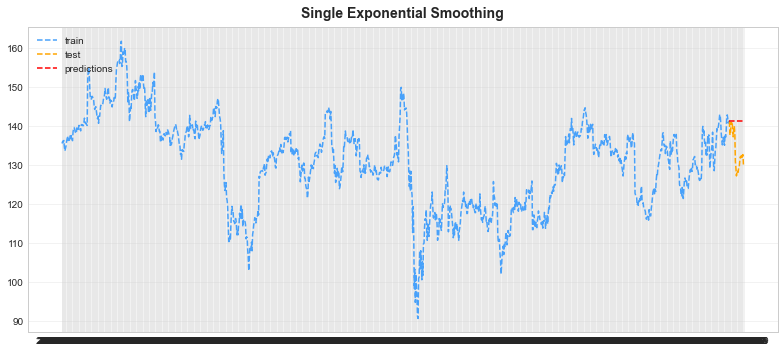

In [25]:
plt.plot(train_data.index, train_data['Close'], '#48A1FA', linestyle="--", label="train")
plt.plot(test_data.index, test_data['Close'], color='orange', linestyle="--", label="test")
plt.plot(test_data.index, single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

## Double Exponential Smoothing

In [26]:
from statsmodels.tsa.api import Holt

double = Holt(train_data['Close']).fit(optimized=True)
double_preds = double.forecast(len(test_data['Close']))
double_preds = double_preds.to_list()
##double_mse = mse(test, double_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test_data['Close'], 
              'Predictions' : double_preds}).head(10))



C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Actual,Predictions
Date,,
2022-07-01,141.119995,141.127224
2022-07-05,137.619995,141.131703
2022-07-06,138.080002,141.136182
2022-07-07,140.830002,141.140660
2022-07-08,140.470001,141.145139
2022-07-11,141.000000,141.149618
2022-07-12,139.179993,141.154096
2022-07-13,137.179993,141.158575
2022-07-14,139.059998,141.163053


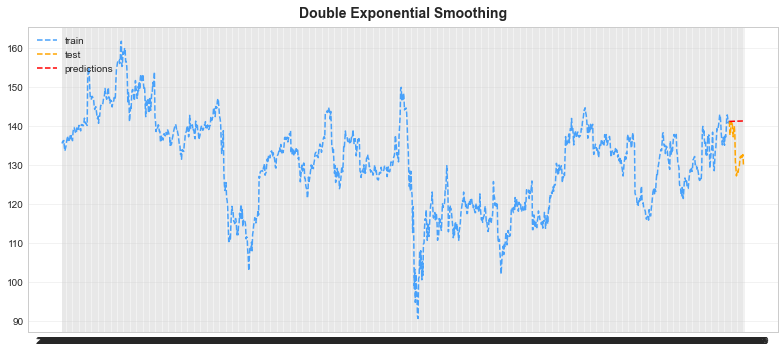

In [27]:
plt.plot(train_data.index, train_data['Close'], '#48A1FA', linestyle="--", label="train")
plt.plot(test_data.index, test_data['Close'], color='orange', linestyle="--", label="test")
plt.plot(test_data.index, double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

## The model predicts a very slight upward trend in the mean so the predicted price is rising by 0.004 every day

## Triple Exponential Smoothing

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train_data['Close'],
                              trend=None,
                              seasonal='additive',
                              seasonal_periods=60).fit(optimized=True)

triple_preds = triple.forecast(len(test_data['Close']))
triple_preds = triple_preds.to_list()


#triple_mse = mse(test, triple_preds)


# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test_data['Close'], 
              'Predictions' : triple_preds}).head(10))

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Actual,Predictions
Date,,
2022-07-01,141.119995,141.335093
2022-07-05,137.619995,140.543140
2022-07-06,138.080002,140.817897
2022-07-07,140.830002,141.132568
2022-07-08,140.470001,141.526865
2022-07-11,141.000000,140.710937
2022-07-12,139.179993,141.503818
2022-07-13,137.179993,141.698559
2022-07-14,139.059998,142.202296


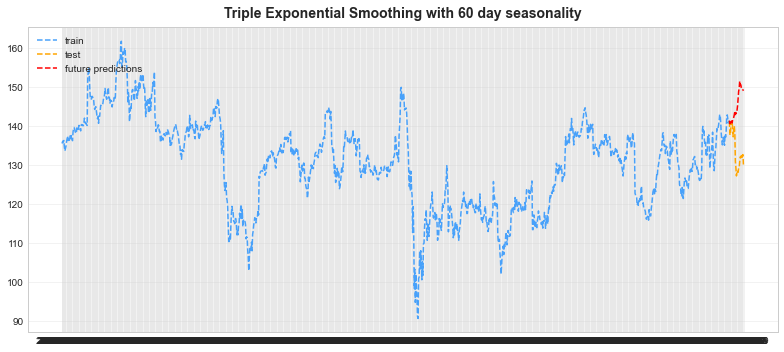

In [29]:
plt.plot(train_data.index, train_data['Close'], '#48A1FA', linestyle="--", label="train")
plt.plot(test_data.index, test_data['Close'], color='orange', linestyle="--", label="test")
plt.plot(test_data.index, triple_preds, 'r--', label="future predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing with 60 day seasonality")
plt.grid(alpha=0.3);

# The model incoprorates seasonal fluxuation, and a strong upward trend. The true seasonality and trend are negatives (opposite direction) of the prediction

# Different seasonality periods 

# Shorter

In [30]:
triple = ExponentialSmoothing(train_data['Close'],
                              trend=None,
                              seasonal='additive',
                              seasonal_periods=20).fit(optimized=True)

triple_preds = triple.forecast(len(test_data['Close']))
triple_preds = triple_preds.to_list()


#triple_mse = mse(test, triple_preds)


# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test_data['Close'], 
              'Predictions' : triple_preds}).head(10))

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Actual,Predictions
Date,,
2022-07-01,141.119995,140.929008
2022-07-05,137.619995,140.375566
2022-07-06,138.080002,140.141596
2022-07-07,140.830002,140.322700
2022-07-08,140.470001,141.220504
2022-07-11,141.000000,141.308501
2022-07-12,139.179993,141.532352
2022-07-13,137.179993,141.639357
2022-07-14,139.059998,141.682193


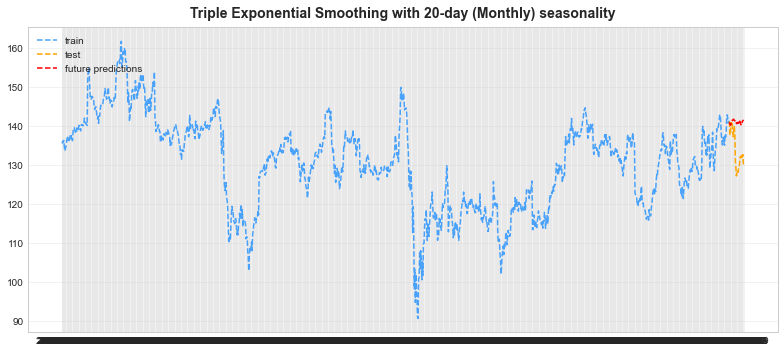

In [31]:
plt.plot(train_data.index, train_data['Close'], '#48A1FA', linestyle="--", label="train")
plt.plot(test_data.index, test_data['Close'], color='orange', linestyle="--", label="test")
plt.plot(test_data.index, triple_preds, 'r--', label="future predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing with 20-day (Monthly) seasonality")
plt.grid(alpha=0.3);

# Longer

In [32]:
triple = ExponentialSmoothing(train_data['Close'],
                              trend=None,
                              seasonal='additive',
                              seasonal_periods=252).fit(optimized=True)

triple_preds = triple.forecast(len(test_data['Close']))
triple_preds = triple_preds.to_list()


#triple_mse = mse(test, triple_preds)


# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test_data['Close'], 
              'Predictions' : triple_preds}).head(10))

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Actual,Predictions
Date,,
2022-07-01,141.119995,140.263233
2022-07-05,137.619995,141.165548
2022-07-06,138.080002,141.832400
2022-07-07,140.830002,142.874733
2022-07-08,140.470001,143.891799
2022-07-11,141.000000,145.258675
2022-07-12,139.179993,145.967057
2022-07-13,137.179993,146.663738
2022-07-14,139.059998,147.182778


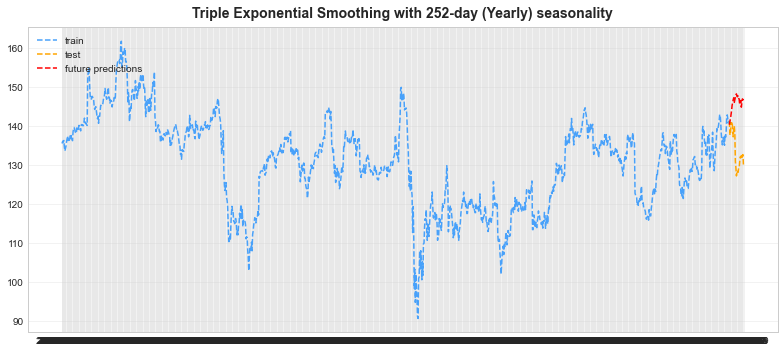

In [33]:
plt.plot(train_data.index, train_data['Close'], '#48A1FA', linestyle="--", label="train")
plt.plot(test_data.index, test_data['Close'], color='orange', linestyle="--", label="test")
plt.plot(test_data.index, triple_preds, 'r--', label="future predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing with 252-day (Yearly) seasonality")
plt.grid(alpha=0.3);

## Longer Seasons allow for larger standard deviation in predictions, but tends to under or over estimate volatility

# Multiplicative instead of additive seasonality

In [34]:
triple = ExponentialSmoothing(train_data['Close'],
                              trend=None,
                              seasonal='multiplicative',
                              seasonal_periods=60).fit(optimized=True)

triple_preds = triple.forecast(len(test_data['Close']))
triple_preds = triple_preds.to_list()


#triple_mse = mse(test, triple_preds)


# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test_data['Close'], 
              'Predictions' : triple_preds}).head(10))

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Actual,Predictions
Date,,
2022-07-01,141.119995,141.346740
2022-07-05,137.619995,140.450040
2022-07-06,138.080002,140.786145
2022-07-07,140.830002,141.083877
2022-07-08,140.470001,141.581759
2022-07-11,141.000000,140.705031
2022-07-12,139.179993,141.488494
2022-07-13,137.179993,141.664613
2022-07-14,139.059998,142.135210


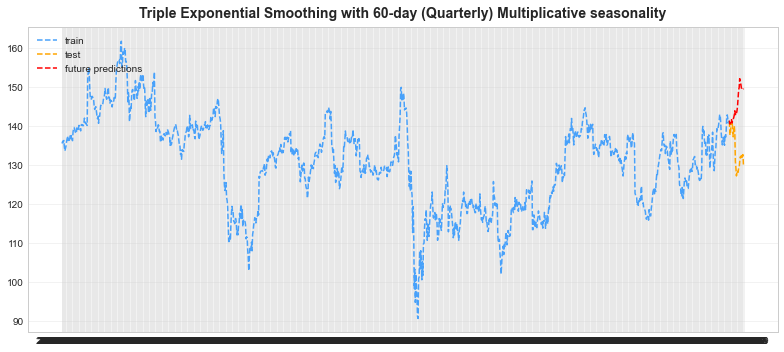

In [35]:
plt.plot(train_data.index, train_data['Close'], '#48A1FA', linestyle="--", label="train")
plt.plot(test_data.index, test_data['Close'], color='orange', linestyle="--", label="test")
plt.plot(test_data.index, triple_preds, 'r--', label="future predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing with 60-day (Quarterly) Multiplicative seasonality")
plt.grid(alpha=0.3);

In [36]:
triple = ExponentialSmoothing(train_data['Close'],
                              trend=None,
                              seasonal='multiplicative',
                              seasonal_periods=20).fit(optimized=True)

triple_preds = triple.forecast(len(test_data['Close']))
triple_preds = triple_preds.to_list()


#triple_mse = mse(test, triple_preds)


# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test_data['Close'], 
              'Predictions' : triple_preds}).head(10))

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Actual,Predictions
Date,,
2022-07-01,141.119995,140.472402
2022-07-05,137.619995,140.121957
2022-07-06,138.080002,139.831529
2022-07-07,140.830002,139.922836
2022-07-08,140.470001,140.574193
2022-07-11,141.000000,140.151987
2022-07-12,139.179993,140.089787
2022-07-13,137.179993,139.904550
2022-07-14,139.059998,139.808079


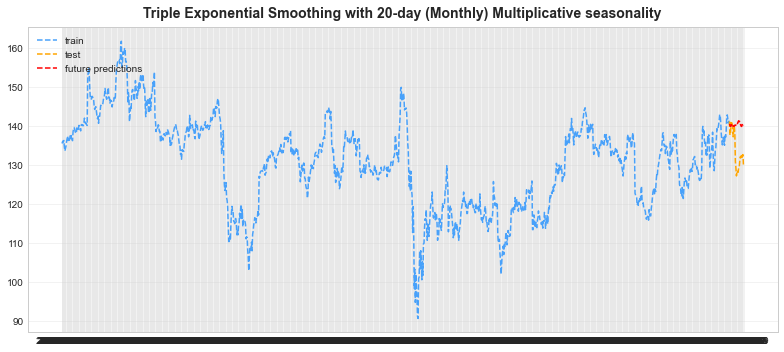

In [37]:
plt.plot(train_data.index, train_data['Close'], '#48A1FA', linestyle="--", label="train")
plt.plot(test_data.index, test_data['Close'], color='orange', linestyle="--", label="test")
plt.plot(test_data.index, triple_preds, 'r--', label="future predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing with 20-day (Monthly) Multiplicative seasonality")
plt.grid(alpha=0.3);

## Multiplicative vs Additive seems to have no change

# In all cases the Exponential Smoothing model fails to predict the downward trend in the future

## Exponential Smoothing Forecasting seems to be a poor choice

# SARIMA Model

In [38]:
import statsmodels.api as sm

# define helper plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data, c='#48A1FA')
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False, c='#48A1FA')
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False, c='#48A1FA')
    sns.despine()
    plt.tight_layout()

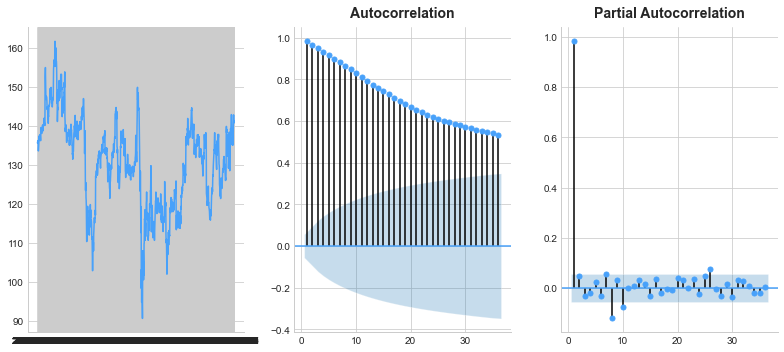

In [39]:
# helper plot for monthly temps
plots(train_data['Close'], lags=36)

In [40]:
sar = sm.tsa.statespace.SARIMAX(train_data['Close'], 
                                order=(2,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                 1232
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -2686.617
Date:                              Sun, 14 Aug 2022   AIC                           5383.234
Time:                                      19:55:06   BIC                           5408.767
Sample:                                           0   HQIC                          5392.844
                                             - 1232                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0016      0.002     -0.717      0.474      -0.006       0.003
ar.L1          0.9366      0.020     46.271      0.000       0.897       0.976
ar.L2          0.0464      0.021      2.196      0.028       0.005       0.088
ma.S.L12      -0.9955      0.051    -19.526      0.000      -1.095      -0.896
sigma2         4.5953      0.216     21.305      0.000       4.173       5.018
===================================================================================
Ljung-Box (Q):                       66.52   Jarque-Bera (JB):              2906.14
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.74
Prob(H) (two-sided):                  0.64   Kurtosis:                        10.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Letting Pyramid ARIMA find the best SARIMA model through AIC minimization

In [41]:
auto_model = pm.auto_arima(train_data['Close'], start_p=0, start_q=0,
                           max_p=3, max_q=3, m=15,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[15] intercept   : AIC=8529.641, Time=1.44 sec
 ARIMA(0,0,0)(0,1,0)[15] intercept   : AIC=8587.852, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[15] intercept   : AIC=5845.065, Time=2.57 sec
 ARIMA(0,0,1)(0,1,1)[15] intercept   : AIC=7363.115, Time=4.15 sec
 ARIMA(0,0,0)(0,1,0)[15]             : AIC=8585.874, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[15] intercept   : AIC=6211.464, Time=0.46 sec
 ARIMA(1,0,0)(2,1,0)[15] intercept   : AIC=5671.935, Time=11.65 sec
 ARIMA(1,0,0)(2,1,1)[15] intercept   : AIC=inf, Time=22.62 sec
 ARIMA(1,0,0)(1,1,1)[15] intercept   : AIC=inf, Time=5.58 sec
 ARIMA(0,0,0)(2,1,0)[15] intercept   : AIC=8511.975, Time=7.89 sec
 ARIMA(2,0,0)(2,1,0)[15] intercept   : AIC=5673.658, Time=15.58 sec
 ARIMA(1,0,1)(2,1,0)[15] intercept   : AIC=5673.678, Time=16.31 sec
 ARIMA(0,0,1)(2,1,0)[15] intercept   : AIC=7373.397, Time=11.53 sec
 ARIMA(2,0,1)(2,1,0)[15] intercept   : AIC=5673.229, Time=35.00 sec
 ARIMA(1,0,0)(2,1,0)[15

# Through stepwise search we find that with a seasonal length of 15 days (3 buisness weeks) the best model is one using a SARIMA model with the following parameters:

# p = 1 (the data is Auto Regressive with the first lag only within a season)
# d = 0 (no seasonal differencing required, the series is stationary within a season)
# q = 0 (no moving average component within a season)

# P = 2 (the model is auto regressive across seasons with the 2 previous occurances at the same phase of the season)
# D = 1 (the model requires differencing with the previous seasonal observation to remain stationary)
# Q = 0 (there is no moving average component across seasons)

# M = 15 (15 days per season)

## For this model we have an exact interpretation that can be useful for explaining to investors why the model makes the predictions that it does

In [42]:
sar = sm.tsa.statespace.SARIMAX(train_data['Close'], 
                                order=(1,0,0), 
                                seasonal_order=(2,1,0,15), 
                                trend='c').fit()
sar.summary()

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1232
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 15)   Log Likelihood               -2830.967
Date:                            Sun, 14 Aug 2022   AIC                           5671.935
Time:                                    19:58:38   BIC                           5697.456
Sample:                                         0   HQIC                          5681.542
                                           - 1232                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0070      0.074      0.095      0.925      -0.138       0.152
ar.L1          0.9612      0.006    164.400      0.000       0.950       0.973
ar.S.L15      -0.7069      0.020    -34.968      0.000      -0.747      -0.667
ar.S.L30      -0.3671      0.021    -17.328      0.000      -0.409      -0.326
sigma2         6.0835      0.134     45.236      0.000       5.820       6.347
===================================================================================
Ljung-Box (Q):                      108.72   Jarque-Bera (JB):              1314.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.46
Prob(H) (two-sided):                  0.35   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# We can see the coefficients to reconstruct the model above. We also find that all parameters (except the intercept) are statistically significant at the alpha = 0.001 level meaning they are very likely to be true predictors.

## Equation is as follows:

### y_t = (0.9612 * y_(t-1)) * (-0.7069 * y_(t-15) + -0.3671 * y_(t-30) + 6.0835 * (y_(t-1) - y_(t-15))) + 0.0070

### Note that the Seasonal Component on the model is multiplied by the Non-Seasonal Component

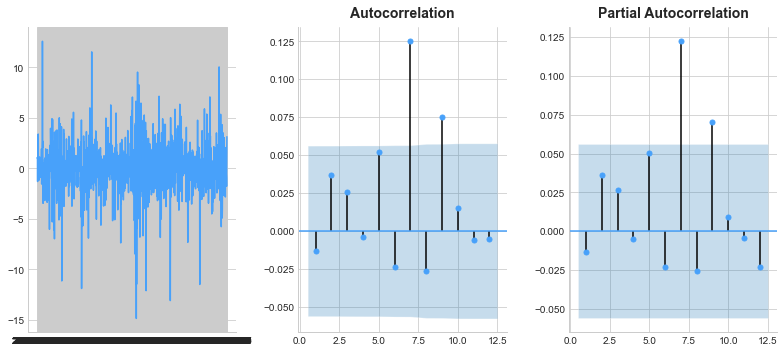

In [43]:

# plot resids
plots(sar.resid[sar.loglikelihood_burn:], lags=12);

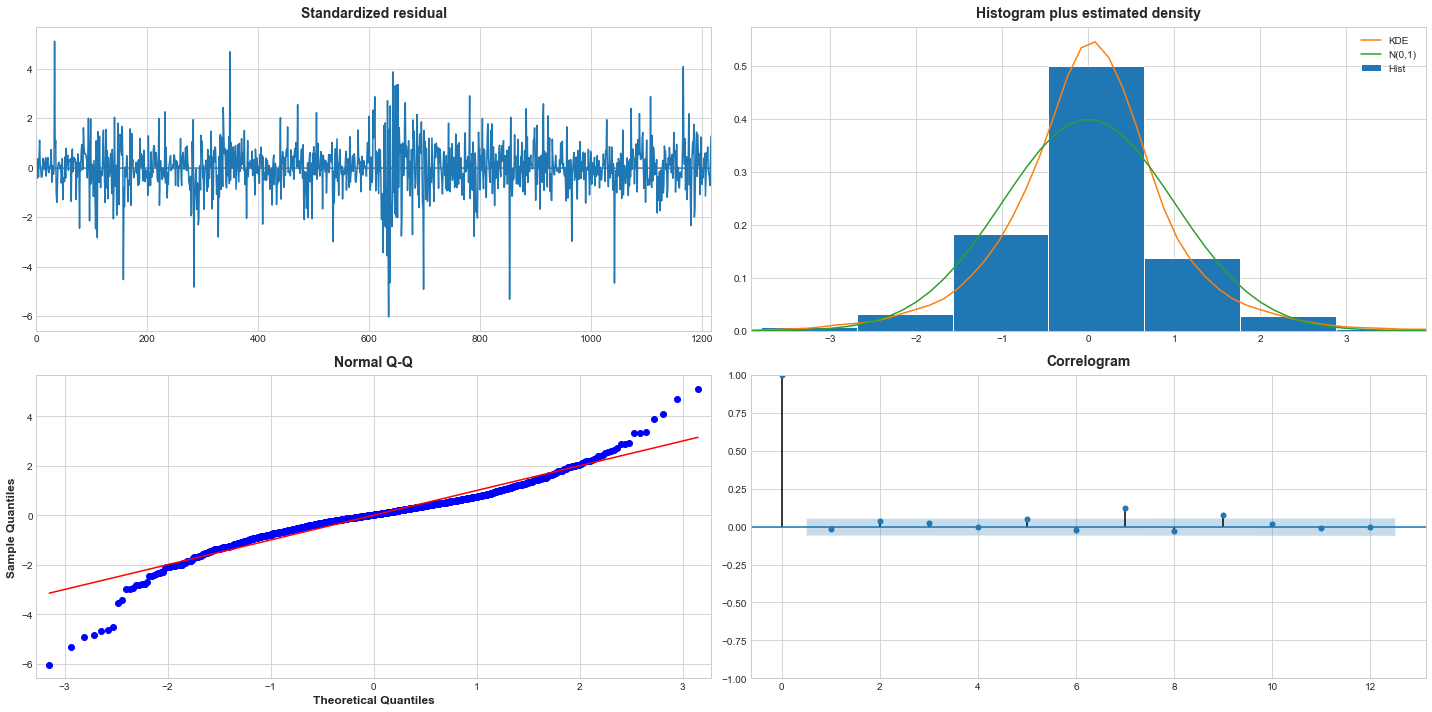

In [44]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

# The reesiduals of the model are fairly staionary and centered around 0 but the data is very heavy tailed. There is strong volatility clustering indicating that the model is not able to account for stressful events on the economy. Notably there is poor performance clustered together around the start of COVID-19 shutdowns despite this, residuals are very small so it is still strong for modeling the series

<ipython-input-46-82723cabe96d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sar_train'] = sar_train


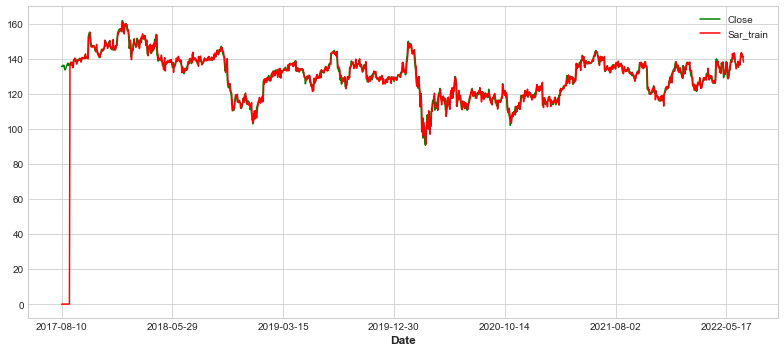

In [46]:
k = len(train_data['Close'])-1
sar_train = sar.predict(start = 0, end= k)
sar_train = sar_train.to_list()
train_data['Sar_train'] = sar_train

train_data[['Close','Sar_train']].plot(color = ('green','red'));

# On the training data the model nearly matches the true time series indicating this is a strong fit for the data, possibly over fit

In [104]:
from sklearn.metrics import mean_squared_error

In [244]:
mean_squared_error(train_data['Close'][15:],train_data['Sar_train'][15:])

6.093046999563773

# Training error is very small

# Now lets look at the forecast errors

C:\Users\denis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-45-0438b6c53aba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sar_preds'] = sar_preds


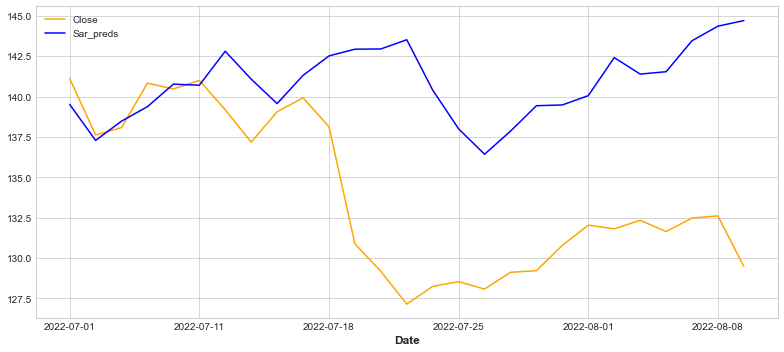

In [45]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
k = len(train_data['Close']) + len(test_data['Close'])-1
sar_preds = sar.predict(start = len(train_data['Close']), end= k)
sar_preds = sar_preds.to_list()
test_data['Sar_preds'] = sar_preds
test_data[['Close','Sar_preds']].plot(color = ('orange','blue'));


In [243]:
mean_squared_error(test_data['Close'],test_data['Sar_preds'])

76.56784120285738

# Over the entire 30 day horizon the model has a much worse performance on the out of sample time horizon, but we can see that in the first 10 days the predictions are very close to the true value

In [326]:
mean_squared_error(test_data['Close'][0:10],test_data['Sar_preds'][0:10])

3.5675890341409278

# In the first 10 days the model makes predictions with an MSE on par with the training data indicating that the model is a good fit on the data for shorter time horizons

# I originally wanted to check other values for M, namely 20 since we had seen earlier in my original plots that 20 day (1 month) seasonality seemed to work well on the data, but in doing so my computer ran out of memory and crashed so I will just move on as this model is already very strong. We had also seen originally that the best choice for season length was between 10 and 20 days using Seasonal Decompose

# Lets look at models using deep learning for comparison

# Recurrent Neural Networks

In [47]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1)
    
    return model

# We need to format the data into a tensor time series shape that the model can interpret

In [48]:
close = {} 
close['y']= train_data['Close'].to_list()
y_train = pd.DataFrame.from_dict(close)
lags = {}
lags['Lag1']= train_data['Close'].shift(1).to_list()
lags['Lag1'][0]=train_data['Close'][0]

lags['Lag2']= train_data['Close'].shift(2).to_list()
lags['Lag2'][0]=train_data['Close'][0]
lags['Lag2'][1]=train_data['Close'][0]

lags['Lag3']= train_data['Close'].shift(3).to_list()
lags['Lag3'][0]=train_data['Close'][0]
lags['Lag3'][1]=train_data['Close'][0]
lags['Lag3'][2]=train_data['Close'][0]

lags['Lag4']= train_data['Close'].shift(4).to_list()
lags['Lag4'][0]=train_data['Close'][0]
lags['Lag4'][1]=train_data['Close'][0]
lags['Lag4'][2]=train_data['Close'][0]
lags['Lag4'][3]=train_data['Close'][0]

lags['Lag5']= train_data['Close'].shift(5).to_list()
lags['Lag5'][0]=train_data['Close'][0]
lags['Lag5'][1]=train_data['Close'][0]
lags['Lag5'][2]=train_data['Close'][0]
lags['Lag5'][3]=train_data['Close'][0]
lags['Lag5'][4]=train_data['Close'][0]

lags['Lag6']= train_data['Close'].shift(6).to_list()
lags['Lag6'][0]=train_data['Close'][0]
lags['Lag6'][1]=train_data['Close'][0]
lags['Lag6'][2]=train_data['Close'][0]
lags['Lag6'][3]=train_data['Close'][0]
lags['Lag6'][4]=train_data['Close'][0]
lags['Lag6'][5]=train_data['Close'][0]

In [49]:
X_train = pd.DataFrame.from_dict(lags)

In [50]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

In [51]:
simple_rnn_mod = fit_SimpleRNN(X_train, y_train, cell_units = 10, epochs = 100)

Epoch 1/100
1232/1232 [==============================] - 3s 2ms/step - loss: 15743.9293
Epoch 2/100
1232/1232 [==============================] - 2s 2ms/step - loss: 12541.9009
Epoch 3/100
1232/1232 [==============================] - 2s 1ms/step - loss: 9921.0200
Epoch 4/100
1232/1232 [==============================] - 2s 2ms/step - loss: 7564.8016
Epoch 5/100
1232/1232 [==============================] - 2s 2ms/step - loss: 5788.0149
Epoch 6/100
1232/1232 [==============================] - 2s 1ms/step - loss: 4183.4331
Epoch 7/100
1232/1232 [==============================] - 2s 1ms/step - loss: 2936.4588
Epoch 8/100
1232/1232 [==============================] - 2s 1ms/step - loss: 1759.0943
Epoch 9/100
1232/1232 [==============================] - 2s 1ms/step - loss: 1095.5532
Epoch 10/100
1232/1232 [==============================] - 2s 1ms/step - loss: 583.2005
Epoch 11/100
1232/1232 [==============================] - 2s 1ms/step - loss: 287.9881
Epoch 12/100
1232/1232 [=================

1232/1232 [==============================] - 2s 1ms/step - loss: 131.6094
Epoch 96/100
1232/1232 [==============================] - 1s 1ms/step - loss: 128.9815
Epoch 97/100
1232/1232 [==============================] - 1s 1ms/step - loss: 136.5609
Epoch 98/100
1232/1232 [==============================] - 1s 1ms/step - loss: 125.9966
Epoch 99/100
1232/1232 [==============================] - 1s 1ms/step - loss: 137.6120
Epoch 100/100
1232/1232 [==============================] - 1s 1ms/step - loss: 126.5161


In [52]:
rnn_preds = simple_rnn_mod.predict(X_train)

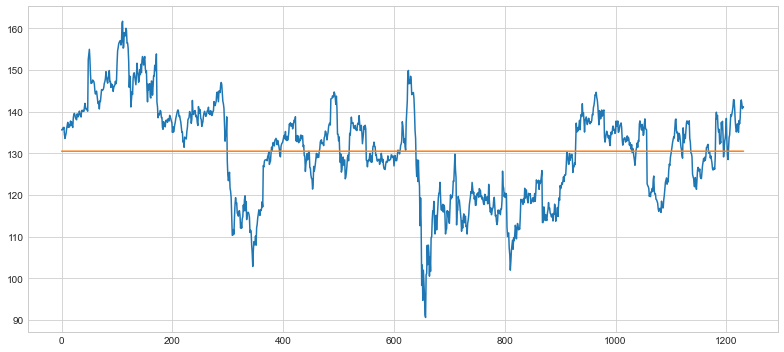

In [53]:
plt.plot(y_train)
plt.plot(rnn_preds)

# The model is exclusively predicting the mean value. Researching online, this means that the model is not complex enough to make a meaningful prediction on any particular value. We can improve this by either adding more lags, or adding more layers to the model. Instead I will just move on to the LSTM model as they are meant to learn more complex structures than a normal RNN model.

In [54]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1)))
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1)
    
    return model

In [55]:
Lstm_model =fit_LSTM(X_train, y_train, cell_units = 10, epochs = 100)

Epoch 1/100
1232/1232 [==============================] - 4s 2ms/step - loss: 16168.0546A: 0s - loss: 16181.84
Epoch 2/100
1232/1232 [==============================] - 2s 2ms/step - loss: 13871.2316
Epoch 3/100
1232/1232 [==============================] - 2s 2ms/step - loss: 11531.1980
Epoch 4/100
1232/1232 [==============================] - 2s 2ms/step - loss: 9608.0153
Epoch 5/100
1232/1232 [==============================] - 2s 2ms/step - loss: 8005.3534
Epoch 6/100
1232/1232 [==============================] - 2s 2ms/step - loss: 6538.4090
Epoch 7/100
1232/1232 [==============================] - 2s 2ms/step - loss: 5311.3103
Epoch 8/100
1232/1232 [==============================] - 2s 2ms/step - loss: 4090.8616
Epoch 9/100
1232/1232 [==============================] - 2s 2ms/step - loss: 3134.6165
Epoch 10/100
1232/1232 [==============================] - 2s 2ms/step - loss: 2278.4419
Epoch 11/100
1232/1232 [==============================] - 2s 2ms/step - loss: 1618.9123
Epoch 12/100
123

1232/1232 [==============================] - 2s 2ms/step - loss: 21.0432
Epoch 96/100
1232/1232 [==============================] - 2s 2ms/step - loss: 21.5095
Epoch 97/100
1232/1232 [==============================] - 2s 2ms/step - loss: 20.6573
Epoch 98/100
1232/1232 [==============================] - 2s 2ms/step - loss: 20.7789
Epoch 99/100
1232/1232 [==============================] - 2s 2ms/step - loss: 22.2221
Epoch 100/100
1232/1232 [==============================] - 2s 2ms/step - loss: 20.8476


In [56]:
lstm_preds = Lstm_model.predict(X_train)

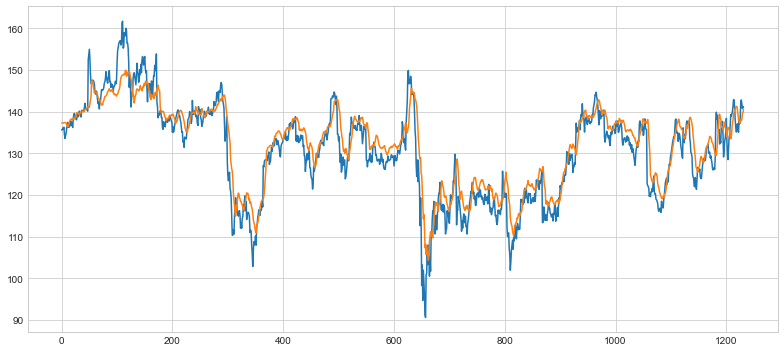

In [57]:
plt.plot(y_train)
plt.plot(lstm_preds)

# Now the model has actually learned something but I would like to include more lags in the input series to improve the MSE before we look at predictions

In [58]:
close = {} 
close['y']= train_data['Close'].to_list()
y_train = pd.DataFrame.from_dict(close)
lags = {}
lags['Lag1']= train_data['Close'].shift(1).to_list()
lags['Lag1'][0]=train_data['Close'][0]

lags['Lag2']= train_data['Close'].shift(2).to_list()
lags['Lag2'][0]=train_data['Close'][0]
lags['Lag2'][1]=train_data['Close'][0]

lags['Lag3']= train_data['Close'].shift(3).to_list()
lags['Lag3'][0]=train_data['Close'][0]
lags['Lag3'][1]=train_data['Close'][0]
lags['Lag3'][2]=train_data['Close'][0]

lags['Lag4']= train_data['Close'].shift(4).to_list()
lags['Lag4'][0]=train_data['Close'][0]
lags['Lag4'][1]=train_data['Close'][0]
lags['Lag4'][2]=train_data['Close'][0]
lags['Lag4'][3]=train_data['Close'][0]

lags['Lag5']= train_data['Close'].shift(5).to_list()
lags['Lag5'][0]=train_data['Close'][0]
lags['Lag5'][1]=train_data['Close'][0]
lags['Lag5'][2]=train_data['Close'][0]
lags['Lag5'][3]=train_data['Close'][0]
lags['Lag5'][4]=train_data['Close'][0]

lags['Lag6']= train_data['Close'].shift(6).to_list()
lags['Lag6'][0]=train_data['Close'][0]
lags['Lag6'][1]=train_data['Close'][0]
lags['Lag6'][2]=train_data['Close'][0]
lags['Lag6'][3]=train_data['Close'][0]
lags['Lag6'][4]=train_data['Close'][0]
lags['Lag6'][5]=train_data['Close'][0]

lags['Lag7']= train_data['Close'].shift(7).to_list()
lags['Lag7'][0]=train_data['Close'][0]
lags['Lag7'][1]=train_data['Close'][0]
lags['Lag7'][2]=train_data['Close'][0]
lags['Lag7'][3]=train_data['Close'][0]
lags['Lag7'][4]=train_data['Close'][0]
lags['Lag7'][5]=train_data['Close'][0]
lags['Lag7'][6]=train_data['Close'][0]

lags['Lag8']= train_data['Close'].shift(8).to_list()
lags['Lag8'][0]=train_data['Close'][0]
lags['Lag8'][1]=train_data['Close'][0]
lags['Lag8'][2]=train_data['Close'][0]
lags['Lag8'][3]=train_data['Close'][0]
lags['Lag8'][4]=train_data['Close'][0]
lags['Lag8'][5]=train_data['Close'][0]
lags['Lag8'][6]=train_data['Close'][0]
lags['Lag8'][7]=train_data['Close'][0]

lags['Lag9']= train_data['Close'].shift(9).to_list()
lags['Lag9'][0]=train_data['Close'][0]
lags['Lag9'][1]=train_data['Close'][0]
lags['Lag9'][2]=train_data['Close'][0]
lags['Lag9'][3]=train_data['Close'][0]
lags['Lag9'][4]=train_data['Close'][0]
lags['Lag9'][5]=train_data['Close'][0]
lags['Lag9'][6]=train_data['Close'][0]
lags['Lag9'][7]=train_data['Close'][0]
lags['Lag9'][8]=train_data['Close'][0]

In [59]:
X_train = pd.DataFrame.from_dict(lags)
X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

In [60]:
Lstm_model =fit_LSTM(X_train, y_train, cell_units = 10, epochs = 100)

Epoch 1/100
1232/1232 [==============================] - 4s 2ms/step - loss: 16846.5551
Epoch 2/100
1232/1232 [==============================] - 2s 2ms/step - loss: 16199.6019
Epoch 3/100
1232/1232 [==============================] - 2s 2ms/step - loss: 14949.5844
Epoch 4/100
1232/1232 [==============================] - 2s 2ms/step - loss: 14163.8394
Epoch 5/100
1232/1232 [==============================] - 3s 2ms/step - loss: 13412.4692
Epoch 6/100
1232/1232 [==============================] - 2s 2ms/step - loss: 12556.5315
Epoch 7/100
1232/1232 [==============================] - 2s 2ms/step - loss: 11612.4416
Epoch 8/100
1232/1232 [==============================] - 2s 2ms/step - loss: 10992.7702A: 0s -
Epoch 9/100
1232/1232 [==============================] - 2s 2ms/step - loss: 10351.6868
Epoch 10/100
1232/1232 [==============================] - 3s 2ms/step - loss: 9529.4008
Epoch 11/100
1232/1232 [==============================] - 2s 2ms/step - loss: 8860.7558
Epoch 12/100
1232/1232 [=

1232/1232 [==============================] - 3s 2ms/step - loss: 39.6459
Epoch 95/100
1232/1232 [==============================] - 3s 2ms/step - loss: 40.9704
Epoch 96/100
1232/1232 [==============================] - 3s 2ms/step - loss: 38.9560
Epoch 97/100
1232/1232 [==============================] - 3s 2ms/step - loss: 35.2214
Epoch 98/100
1232/1232 [==============================] - 3s 2ms/step - loss: 37.7411
Epoch 99/100
1232/1232 [==============================] - 3s 2ms/step - loss: 37.3368
Epoch 100/100
1232/1232 [==============================] - 3s 2ms/step - loss: 36.9688


# The model got stuck, so I will add cell units to improve models ability to interpret the larger series sizes

In [62]:
Lstm_model =fit_LSTM(X_train, y_train, cell_units = 20, epochs = 100)

Epoch 1/100
1232/1232 [==============================] - 4s 2ms/step - loss: 15701.0401
Epoch 2/100
1232/1232 [==============================] - 3s 2ms/step - loss: 11420.0550
Epoch 3/100
1232/1232 [==============================] - 3s 2ms/step - loss: 8327.9342
Epoch 4/100
1232/1232 [==============================] - 3s 2ms/step - loss: 5806.2043
Epoch 5/100
1232/1232 [==============================] - 3s 2ms/step - loss: 3771.4946
Epoch 6/100
1232/1232 [==============================] - 3s 2ms/step - loss: 2316.0381
Epoch 7/100
1232/1232 [==============================] - 3s 2ms/step - loss: 1287.2380
Epoch 8/100
1232/1232 [==============================] - 3s 2ms/step - loss: 634.4129
Epoch 9/100
1232/1232 [==============================] - 3s 2ms/step - loss: 298.9651
Epoch 10/100
1232/1232 [==============================] - 3s 2ms/step - loss: 169.6378
Epoch 11/100
1232/1232 [==============================] - 3s 2ms/step - loss: 134.0905
Epoch 12/100
1232/1232 [===================

1232/1232 [==============================] - 3s 2ms/step - loss: 19.3796
Epoch 97/100
1232/1232 [==============================] - 3s 2ms/step - loss: 21.8501
Epoch 98/100
1232/1232 [==============================] - 3s 2ms/step - loss: 20.8907
Epoch 99/100
1232/1232 [==============================] - 4s 3ms/step - loss: 17.1520
Epoch 100/100
1232/1232 [==============================] - 3s 3ms/step - loss: 17.9581


In [63]:
lstm_preds = Lstm_model.predict(X_train)

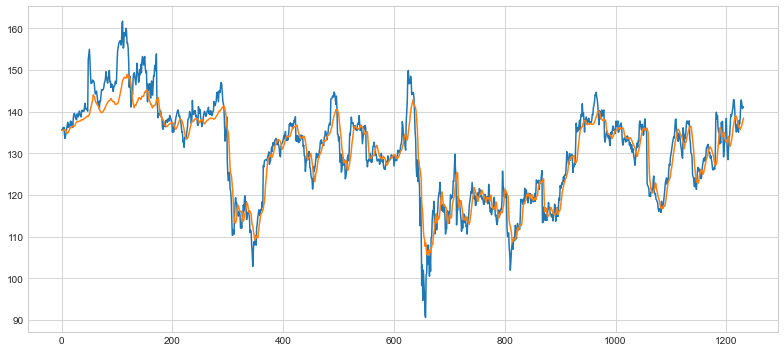

In [64]:
plt.plot(y_train)
plt.plot(lstm_preds)

# This is better than before but I still think we can improve further by making the model deeper by adding a second LSTM layer. I was researching on Kaggle and found a series of projects on time series analysis for stock data on stocks in the DJIA 30 which seemed to show adding a second LSTM Layer has improved performance over single LSTM layer models for stock forecasting

# The projects I am refering to can be found here:
## [DJIA 30 Stock Forecasting 2018](https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231/code)

In [65]:
def fit_double_LSTM(train_X, train_y, cell_units, epochs, ):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, return_sequences=True,input_shape=(train_X.shape[1],1)))
    model.add(LSTM(cell_units))
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1)
    
    return model

In [66]:
double_Lstm_model =fit_double_LSTM(X_train, y_train, cell_units = 20, epochs = 100)

Epoch 1/100
1232/1232 [==============================] - 10s 5ms/step - loss: 14570.6371
Epoch 2/100
1232/1232 [==============================] - 7s 6ms/step - loss: 9090.7398
Epoch 3/100
1232/1232 [==============================] - 6s 5ms/step - loss: 5344.4445
Epoch 4/100
1232/1232 [==============================] - 5s 4ms/step - loss: 2879.1584
Epoch 5/100
1232/1232 [==============================] - 6s 5ms/step - loss: 1314.3251
Epoch 6/100
1232/1232 [==============================] - 6s 5ms/step - loss: 483.2487
Epoch 7/100
1232/1232 [==============================] - 5s 4ms/step - loss: 193.6328
Epoch 8/100
1232/1232 [==============================] - 6s 5ms/step - loss: 140.5790
Epoch 9/100
1232/1232 [==============================] - 5s 4ms/step - loss: 131.2209
Epoch 10/100
1232/1232 [==============================] - 5s 4ms/step - loss: 129.8811
Epoch 11/100
1232/1232 [==============================] - 5s 4ms/step - loss: 129.0401
Epoch 12/100
1232/1232 [=====================

1232/1232 [==============================] - 5s 4ms/step - loss: 10.7474
Epoch 97/100
1232/1232 [==============================] - 4s 4ms/step - loss: 10.6966
Epoch 98/100
1232/1232 [==============================] - 4s 4ms/step - loss: 10.3887
Epoch 99/100
1232/1232 [==============================] - 5s 4ms/step - loss: 11.7037
Epoch 100/100
1232/1232 [==============================] - 4s 4ms/step - loss: 10.8290


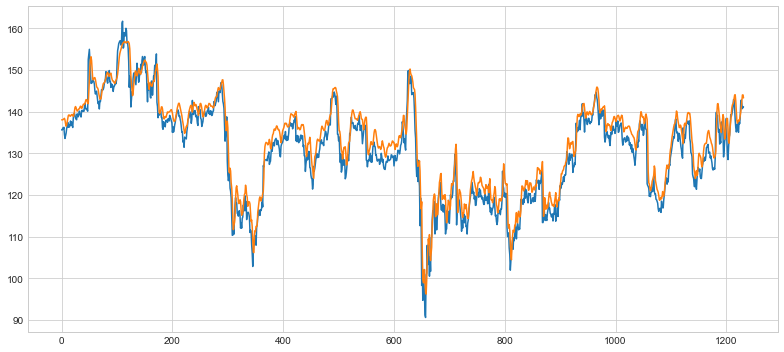

In [67]:
double_lstm_preds = double_Lstm_model.predict(X_train)
plt.plot(y_train)
plt.plot(double_lstm_preds)

# This is way better now we can forecast

In [68]:
def forecast_prediction(X_init, y_init, n_steps, model):
    """
    We want to iteratively predict on the most recent data. The easiest way to do this is to input just the X_train.shape[1]
    most recent values from y_init. Then at each future time step we drop the oldest timestep in the sequence and shift the
    sequence up, then append the predicted value as the new most recent observation for lag 1. We store the predictions at
    each step in a list to return at the end.
    """
    k = len(y_init)
    lags = X_init.shape[1]
    z = []
    for i in range(lags):
        k=k-1
        z.append(y_init[k])
    
    test = np.array(z)
    test = test.reshape(1,len(z),1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(test)
        preds.append(pred)
        #shift lagged data to move 1 step foreward
        for i in range(lags-1):
            test[0][lags-1-i]=test[0][lags-2-i]
        # replace 1st value with prediction
        test[0][0] = pred
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

In [69]:
n = len(test_data['Close'])
double_lstm_future = forecast_prediction(X_train,y_train['y'], n, double_Lstm_model)

In [70]:
double_lstm_future

array([[142.77011],
       [143.16866],
       [143.71028],
       [144.50224],
       [145.2428 ],
       [145.91557],
       [146.60068],
       [147.2168 ],
       [147.74042],
       [148.20528],
       [148.63036],
       [148.99005],
       [149.30113],
       [149.57881],
       [149.82315],
       [150.03763],
       [150.22867],
       [150.39928],
       [150.55106],
       [150.68677],
       [150.80843],
       [150.91727],
       [151.01479],
       [151.10225],
       [151.18068],
       [151.25098],
       [151.31404]], dtype=float32)

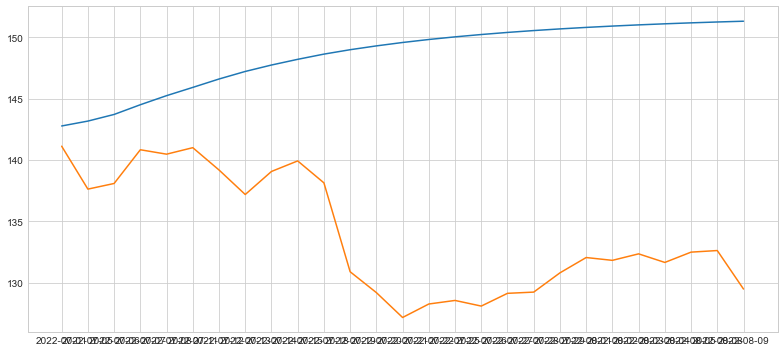

In [71]:
plt.plot(double_lstm_future)
plt.plot(test_data['Close'])

# This model is not very strong for forecasting, maybe we over fit to the training data

In [328]:
mean_squared_error(double_lstm_future, test_data['Close'])

263.4307061365709

# What about the single layer model 

In [72]:
n = len(test_data['Close'])
single_lstm_future = forecast_prediction(X_train,y_train['y'], n, Lstm_model)

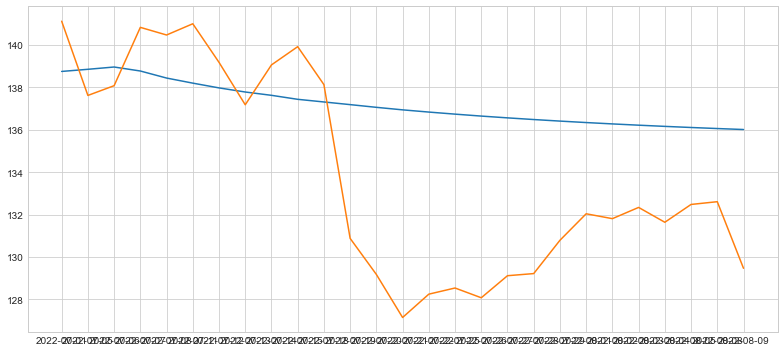

In [73]:
plt.plot(single_lstm_future)
plt.plot(test_data['Close'])

In [331]:
mean_squared_error(single_lstm_future, test_data['Close'])

26.977983925039897

In [332]:
mean_squared_error(single_lstm_future[0:10], test_data['Close'][0:10])

3.4132275803571703

# The single lstm model actually outperformed the double model but I think the double lstm model can actually improve with more lags. The single lstm model is stronger than the SARIMA model on the entire 30 day time horizon but weaker on the first 10 days

In [74]:
train_data.shape

(1232, 7)

In [75]:
## Lets get data on 30 lags
B=np.empty((len(y_train['y']),9))
for i in range(9):
        lag_cur = y_train['y'].shift(i+1)
        B[:,i] = lag_cur
B = B.reshape(len(y_train['y']),9,1)
B[0]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [76]:
def make_training_data(y_init, lags):
    X = np.empty((len(y_init), lags))
    for i in range(lags):
        lag_cur = y_init.shift(i+1, fill_value = y_init[0])
        X[:,i] = lag_cur
    X = X.reshape(len(y_init), lags, 1)
    return X

In [77]:
X_train = make_training_data(y_init = y_train['y'], lags = 20)

# I just realized after going back to review my work that I only entered 20 lags, not 30, so note that this was a typo

In [78]:
double_Lstm_model_30 =fit_double_LSTM(X_train, y_train, cell_units = 40, epochs = 100)

Epoch 1/100
1232/1232 [==============================] - 11s 7ms/step - loss: 12681.6695
Epoch 2/100
1232/1232 [==============================] - 10s 8ms/step - loss: 4434.7366
Epoch 3/100
1232/1232 [==============================] - 10s 8ms/step - loss: 1210.9132
Epoch 4/100
1232/1232 [==============================] - 10s 8ms/step - loss: 280.9902
Epoch 5/100
1232/1232 [==============================] - 9s 8ms/step - loss: 133.9379
Epoch 6/100
1232/1232 [==============================] - 10s 8ms/step - loss: 131.4472
Epoch 7/100
1232/1232 [==============================] - 10s 8ms/step - loss: 130.4931
Epoch 8/100
1232/1232 [==============================] - 9s 7ms/step - loss: 135.0261
Epoch 9/100
1232/1232 [==============================] - 9s 7ms/step - loss: 135.7403
Epoch 10/100
1232/1232 [==============================] - 8s 7ms/step - loss: 130.5692
Epoch 11/100
1232/1232 [==============================] - 9s 7ms/step - loss: 125.6613
Epoch 12/100
1232/1232 [==================

1232/1232 [==============================] - 8s 7ms/step - loss: 12.3846
Epoch 97/100
1232/1232 [==============================] - 8s 7ms/step - loss: 11.2510
Epoch 98/100
1232/1232 [==============================] - 8s 7ms/step - loss: 11.1115
Epoch 99/100
1232/1232 [==============================] - 8s 7ms/step - loss: 10.7330
Epoch 100/100
1232/1232 [==============================] - 8s 7ms/step - loss: 10.9029


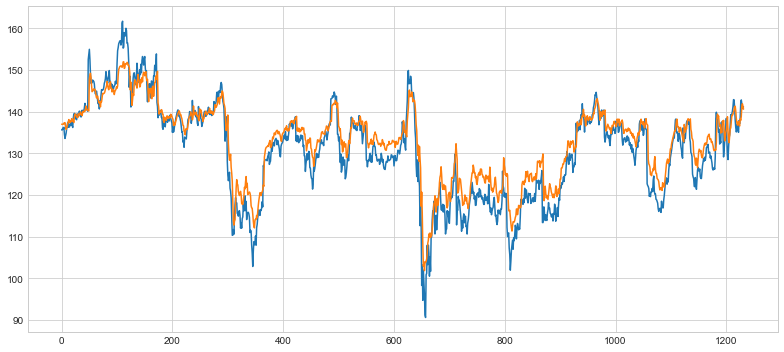

In [79]:
double_lstm_preds_30 = double_Lstm_model_30.predict(X_train)
plt.plot(y_train)
plt.plot(double_lstm_preds_30)

In [80]:
double_lstm_30_future = forecast_prediction(X_train,y_train['y'], n, double_Lstm_model_30)

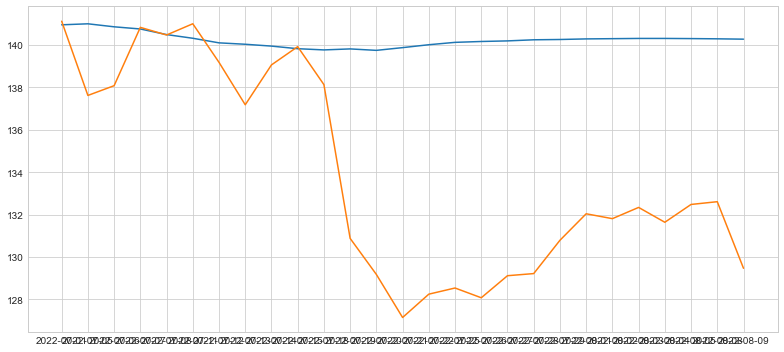

In [81]:
plt.plot(double_lstm_30_future)
plt.plot(test_data['Close'])

## To improve the forecasting power I am going to include a validation split in the Keras fit function to allow for validation on out of sample training data to improve the predictive power

In [82]:
def fit_double_LSTM(train_X, train_y, cell_units, epochs, valid_split):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, return_sequences=True,input_shape=(train_X.shape[1],1)))
    model.add(LSTM(cell_units))
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1, validation_split = valid_split)
    
    return model

In [83]:
double_Lstm_model_30 =fit_double_LSTM(X_train, y_train, cell_units = 40, epochs = 100, valid_split = 0.2)

Epoch 1/100
985/985 [==============================] - 12s 10ms/step - loss: 13368.7928 - val_loss: 7365.4009
Epoch 2/100
985/985 [==============================] - 7s 7ms/step - loss: 5978.7906 - val_loss: 2988.5688
Epoch 3/100
985/985 [==============================] - 7s 7ms/step - loss: 2354.7767 - val_loss: 924.3442
Epoch 4/100
985/985 [==============================] - 7s 7ms/step - loss: 777.6341 - val_loss: 204.9573
Epoch 5/100
985/985 [==============================] - 8s 8ms/step - loss: 246.9634 - val_loss: 57.5539
Epoch 6/100
985/985 [==============================] - 7s 7ms/step - loss: 164.5327 - val_loss: 41.7653
Epoch 7/100
985/985 [==============================] - 7s 7ms/step - loss: 160.5197 - val_loss: 40.9398
Epoch 8/100
985/985 [==============================] - 7s 7ms/step - loss: 154.7181 - val_loss: 41.7469
Epoch 9/100
985/985 [==============================] - 7s 7ms/step - loss: 154.5470 - val_loss: 41.3758
Epoch 10/100
985/985 [==============================

985/985 [==============================] - 7s 7ms/step - loss: 20.2341 - val_loss: 20.0169
Epoch 80/100
985/985 [==============================] - 7s 7ms/step - loss: 19.5873 - val_loss: 11.8196
Epoch 81/100
985/985 [==============================] - 7s 7ms/step - loss: 16.4885 - val_loss: 24.3023
Epoch 82/100
985/985 [==============================] - 7s 7ms/step - loss: 21.7665 - val_loss: 10.9018
Epoch 83/100
985/985 [==============================] - 7s 7ms/step - loss: 15.5717 - val_loss: 9.3938
Epoch 84/100
985/985 [==============================] - 7s 7ms/step - loss: 13.5785 - val_loss: 9.9789
Epoch 85/100
985/985 [==============================] - 7s 7ms/step - loss: 16.4874 - val_loss: 8.6206
Epoch 86/100
985/985 [==============================] - 7s 7ms/step - loss: 15.4345 - val_loss: 14.6153
Epoch 87/100
985/985 [==============================] - 7s 7ms/step - loss: 16.8974 - val_loss: 11.5527
Epoch 88/100
985/985 [==============================] - 7s 7ms/step - loss: 14.4

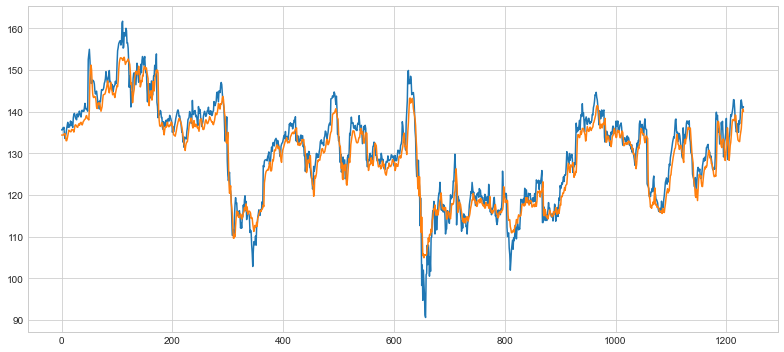

In [84]:
double_lstm_preds_30 = double_Lstm_model_30.predict(X_train)
plt.plot(y_train)
plt.plot(double_lstm_preds_30)

In [85]:
double_lstm_30_future = forecast_prediction(X_train,y_train['y'], n, double_Lstm_model_30)

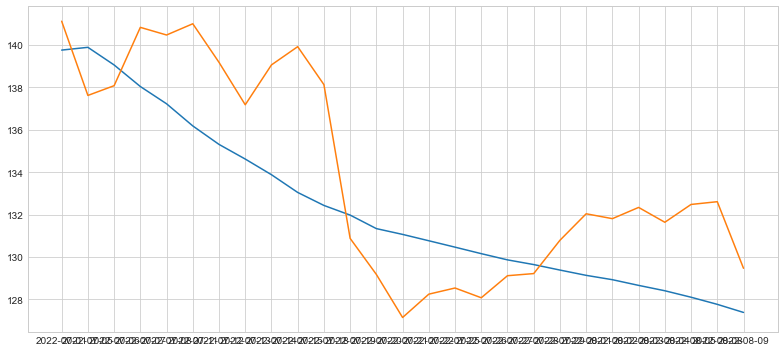

In [86]:
plt.plot(double_lstm_30_future)
plt.plot(test_data['Close'])

In [108]:
mean_squared_error(test_data['Close'], double_lstm_30_future)

11.235317631003953

# This model is much better. I would also like to show that if we add too many lags the model performance gets weaker.


In [87]:
close = {} 
close['y']= train_data['Close'].to_list()
y_train = pd.DataFrame.from_dict(close)

In [88]:
X_train = make_training_data(y_init = y_train['y'], lags = 50)

In [92]:
double_Lstm_model_50 =fit_double_LSTM(X_train, y_train, cell_units = 70, epochs = 50, valid_split = 0.2)

Epoch 1/50
985/985 [==============================] - 19s 16ms/step - loss: 11157.8021 - val_loss: 3532.1699
Epoch 2/50
985/985 [==============================] - 16s 16ms/step - loss: 2528.2159 - val_loss: 495.5050
Epoch 3/50
985/985 [==============================] - 16s 17ms/step - loss: 404.9169 - val_loss: 60.9040
Epoch 4/50
985/985 [==============================] - 16s 17ms/step - loss: 163.6585 - val_loss: 41.5109
Epoch 5/50
985/985 [==============================] - 16s 17ms/step - loss: 156.3712 - val_loss: 40.8008
Epoch 6/50
985/985 [==============================] - 16s 17ms/step - loss: 155.8941 - val_loss: 41.2711
Epoch 7/50
985/985 [==============================] - 16s 17ms/step - loss: 151.9873 - val_loss: 41.5916
Epoch 8/50
985/985 [==============================] - 17s 17ms/step - loss: 162.6320 - val_loss: 40.6350
Epoch 9/50
985/985 [==============================] - 16s 16ms/step - loss: 153.2316 - val_loss: 40.6371
Epoch 10/50
985/985 [============================

In [93]:
double_lstm_50_future = forecast_prediction(X_train,y_train['y'], n, double_Lstm_model_50)

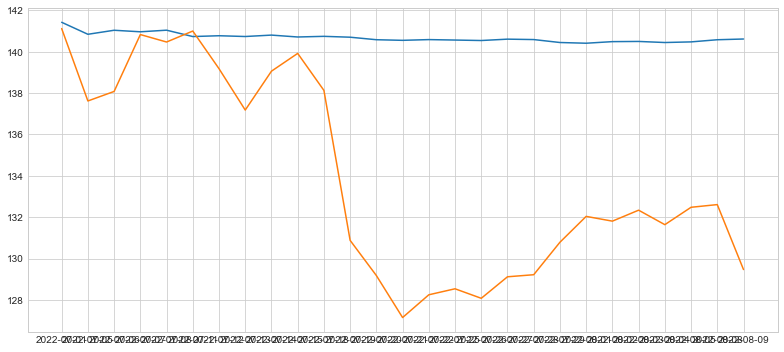

In [94]:
plt.plot(double_lstm_50_future)
plt.plot(test_data['Close'])

# With too many lags in the data the model is unable to correct itself on a daily basis so there is not much change in predictions over the 30 days

# Note that at this point I had intended to compare a 20 lag model to the previous 30 lag model but I now realize that the previous model also only used 20 lags so we can just think of this next part as naming the model properly haha 

In [339]:
X_train = make_training_data(y_init = y_train['y'], lags = 20)

In [96]:
double_Lstm_model_20 =fit_double_LSTM(X_train, y_train, cell_units = 40, epochs = 100, valid_split = 0.2)

Epoch 1/100
985/985 [==============================] - 10s 7ms/step - loss: 13441.1292 - val_loss: 7325.5000
Epoch 2/100
985/985 [==============================] - 6s 6ms/step - loss: 6168.1990 - val_loss: 2980.2415
Epoch 3/100
985/985 [==============================] - 8s 8ms/step - loss: 2440.2044 - val_loss: 922.1687
Epoch 4/100
985/985 [==============================] - 7s 8ms/step - loss: 754.5853 - val_loss: 204.5220
Epoch 5/100
985/985 [==============================] - 8s 8ms/step - loss: 239.5801 - val_loss: 55.9606
Epoch 6/100
985/985 [==============================] - 8s 8ms/step - loss: 160.6559 - val_loss: 41.3170
Epoch 7/100
985/985 [==============================] - 8s 8ms/step - loss: 150.1212 - val_loss: 41.2022
Epoch 8/100
985/985 [==============================] - 7s 8ms/step - loss: 159.4365 - val_loss: 40.8657
Epoch 9/100
985/985 [==============================] - 8s 8ms/step - loss: 151.4584 - val_loss: 41.0767
Epoch 10/100
985/985 [==============================]

Epoch 80/100
985/985 [==============================] - 7s 8ms/step - loss: 11.5514 - val_loss: 9.3925
Epoch 81/100
985/985 [==============================] - 7s 7ms/step - loss: 11.5957 - val_loss: 10.0592
Epoch 82/100
985/985 [==============================] - 8s 8ms/step - loss: 11.1551 - val_loss: 36.5033
Epoch 83/100
985/985 [==============================] - 7s 7ms/step - loss: 11.6610 - val_loss: 9.0728
Epoch 84/100
985/985 [==============================] - 8s 8ms/step - loss: 10.9745 - val_loss: 14.7098
Epoch 85/100
985/985 [==============================] - 7s 8ms/step - loss: 10.9200 - val_loss: 11.3961
Epoch 86/100
985/985 [==============================] - 8s 8ms/step - loss: 11.0008 - val_loss: 11.4189
Epoch 87/100
985/985 [==============================] - 7s 7ms/step - loss: 11.0257 - val_loss: 8.2452
Epoch 88/100
985/985 [==============================] - 8s 8ms/step - loss: 10.2253 - val_loss: 7.8478
Epoch 89/100
985/985 [==============================] - 7s 7ms/step 

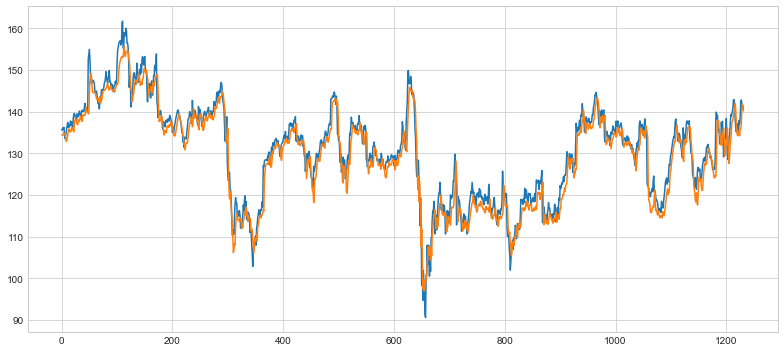

In [340]:
double_lstm_preds_20 = double_Lstm_model_20.predict(X_train)
plt.plot(y_train)
plt.plot(double_lstm_preds_20)

In [341]:
mean_squared_error(double_lstm_preds_20, y_train)

10.275192966717093

In [97]:
double_lstm_20_future = forecast_prediction(X_train,y_train['y'], n, double_Lstm_model_20)

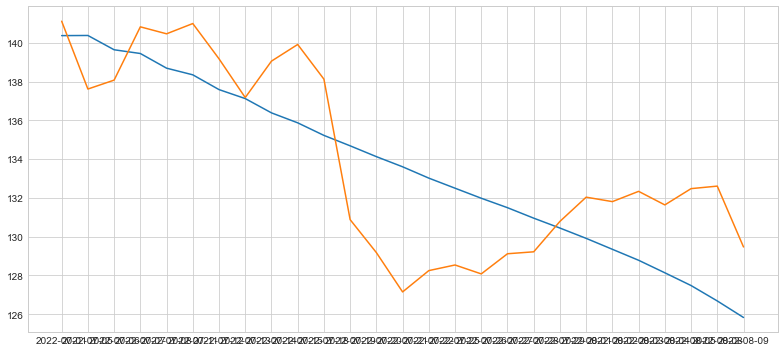

In [99]:
plt.plot(double_lstm_20_future)
plt.plot(test_data['Close'])

In [106]:
mean_squared_error(test_data['Close'], double_lstm_20_future)

11.452634924691926

In [334]:
mean_squared_error(test_data['Close'][0:10], double_lstm_20_future[0:10])

4.869502071840495

# I wanted to try adding more layers, as I have seen good results from users on kaggle on similar datasets, but as can be seen below, the computation time will become too long to be worth it on my machine. The model requires more cells than the 2 layer model and so I chose not to work with it since my laptop does not have a good gpu for parallel processing

In [100]:
def fit_triple_LSTM(train_X, train_y, cell_units, epochs, valid_split):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, return_sequences=True,input_shape=(train_X.shape[1],1)))
    model.add(LSTM(cell_units,  return_sequences=True))
    model.add(LSTM(cell_units))
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1, validation_split = valid_split)
    
    return model

In [101]:
triple_Lstm_model_20 = fit_triple_LSTM(X_train, y_train, cell_units = 40, epochs = 100, valid_split = 0.2)

Epoch 1/100
985/985 [==============================] - 16s 13ms/step - loss: 13135.6415 - val_loss: 7244.8730
Epoch 2/100
985/985 [==============================] - 10s 10ms/step - loss: 5935.4354 - val_loss: 2932.8943
Epoch 3/100
985/985 [==============================] - 11s 11ms/step - loss: 2337.9310 - val_loss: 898.1868
Epoch 4/100
985/985 [==============================] - 11s 11ms/step - loss: 755.0251 - val_loss: 198.4680
Epoch 5/100
985/985 [==============================] - 11s 12ms/step - loss: 229.2405 - val_loss: 54.8961
Epoch 6/100
985/985 [==============================] - 11s 11ms/step - loss: 168.3229 - val_loss: 41.6401
Epoch 7/100
985/985 [==============================] - 11s 12ms/step - loss: 157.9104 - val_loss: 40.9522
Epoch 8/100
985/985 [==============================] - 11s 12ms/step - loss: 165.9309 - val_loss: 41.3812
Epoch 9/100
985/985 [==============================] - 11s 11ms/step - loss: 163.7864 - val_loss: 41.0672
Epoch 10/100
985/985 [==============

985/985 [==============================] - 11s 11ms/step - loss: 152.4999 - val_loss: 41.5067
Epoch 78/100
985/985 [==============================] - 11s 11ms/step - loss: 160.0747 - val_loss: 41.4588
Epoch 79/100
985/985 [==============================] - 11s 11ms/step - loss: 153.5867 - val_loss: 40.9209
Epoch 80/100
985/985 [==============================] - 11s 11ms/step - loss: 141.5664 - val_loss: 40.6367
Epoch 81/100
985/985 [==============================] - 11s 11ms/step - loss: 152.4381 - val_loss: 40.7700
Epoch 82/100
985/985 [==============================] - 11s 11ms/step - loss: 151.1648 - val_loss: 40.6894
Epoch 83/100
985/985 [==============================] - 11s 11ms/step - loss: 158.3544 - val_loss: 41.3360
Epoch 84/100
985/985 [==============================] - 11s 12ms/step - loss: 159.0342 - val_loss: 40.8632
Epoch 85/100
985/985 [==============================] - 11s 12ms/step - loss: 150.9582 - val_loss: 41.6978
Epoch 86/100
985/985 [============================

# The double LSTM model with 20 lags and 40 cells using 20% of the training data for out of sample validation is definitely the strongest on the data so far, but there is one more trick we can use. We can use a SARIMA model to make a prediction on the data and use a LSTM model to make error corrections to enhance the predictions.

## A final method for forecasting that has been shown to have the best results, is to use an ensemble model with a SARIMA model and an LSTM model, where the LSTM model is trained on the residuals of the SARIMA model to correct for the prediction errors.

## Recall that I stored the predictions of the SARIMA model on the training data in the training data as Sar_train

In [110]:
train_data['Sar_train']

Date
2017-08-10      0.087249
2017-08-11      0.094621
2017-08-14      0.101334
2017-08-15      0.107424
2017-08-16      0.112859
                 ...    
2022-06-27    143.436905
2022-06-28    142.764759
2022-06-29    142.486859
2022-06-30    140.137995
2022-07-01    137.983219
Name: Sar_train, Length: 1232, dtype: float64

In [112]:
Sar_res = train_data['Close']-train_data['Sar_train']

In [113]:
train_data['Sar_res'] = Sar_res

<ipython-input-113-394df364773b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sar_res'] = Sar_res


In [116]:
train_data['Sar_res']

Date
2017-08-10    135.515046
2017-08-11    135.507674
2017-08-14    135.959854
2017-08-15    135.714750
2017-08-16    136.120417
                 ...    
2022-06-27     -0.636902
2022-06-28     -0.904758
2022-06-29     -1.776852
2022-06-30      1.052007
2022-07-01      3.136776
Name: Sar_res, Length: 1232, dtype: float64

# We can input into our second model now the residuals as the target value, but we need to think about what we should use as features for the model. We can use the same method as before where we input the lagged series of the closing price, but now we could also consider the lagged series of residuals. To include both, I need to restructure my functions for building the X_train and the input shape for the LSTM model.

In [177]:
def make_res_training_data(y_init, res_init,  lags):
    X = np.empty((len(y_init), lags, 2))
    for i in range(lags):
        lag_cur_y = y_init.shift(i+1, fill_value = y_init[0])
        lag_cur_res = res_init.shift(i+1, fill_value = res_init[0])
        ab = np.empty((2, len(y_init)))
        ab[0] = lag_cur_y
        ab[1] = lag_cur_res
        ab = np.transpose(ab)
        X[:,i] = ab
    
    return X

# I can check that my function runs properly below

In [192]:
X_check = make_res_training_data(y_train['y'], Sar_res,  5)

In [193]:
X_old = make_training_data(y_train['y'],  5)

In [194]:
X_check

array([[[135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ]],

       [[135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ]],

       [[135.602295  , 135.50767374],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ],
        [135.602295  , 135.5150463 ]],

       ...,

       [[141.860001  ,  -0.90475787],
        [142.800003  ,  -0.63690209],
        [142.059998  ,  -0.27069566],
        [138.440002  ,   2.06094086],
        [137.080002  ,   0.73692568]],

       [[140.710007  ,  -1.77685172],
        [141.860001  ,  -0.90475787],
        [142.800003  ,  -0.63690209],
        [142.059998  ,  -0.27069566],
        [138.440002  ,   2.06094086]],

       [[141.190002  ,   1.

We get a tensor containing 5 timesteps of 2 series. We can check that they are in the right order by comparing an element of a similarly sized tensor produced by the old method with elements in the first series of the new method

In [195]:
X_check[80]

array([[147.954117  ,   0.7282155 ],
       [147.198853  ,  -3.36393896],
       [146.797318  ,   0.9134443 ],
       [145.764816  ,   0.6560418 ],
       [145.296371  ,   0.7795696 ]])

In [196]:
X_old[80]

array([[147.954117],
       [147.198853],
       [146.797318],
       [145.764816],
       [145.296371]])

## The 5 lags of the Close price at time step 80 are in the same correct order. My function works as intended

# Now we just need to train an LSTM model on the residuals of the sarima model.

In [201]:
def fit_LSTM_new(train_X, train_y, cell_units, epochs, valid_split):
    """
    Fit LSTM to data train_X, train_y where train_X consists of 2 paired time_series
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],2)))
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1, validation_split = valid_split)
    
    return model

In [203]:
X_res_train = make_res_training_data(y_train['y'], Sar_res,  20)

In [204]:
residual_Lstm_model_20 = fit_LSTM_new(X_res_train, Sar_res, cell_units = 40, epochs = 100, valid_split = 0.2)

Epoch 1/100
985/985 [==============================] - 5s 4ms/step - loss: 298.2833 - val_loss: 4.5228
Epoch 2/100
985/985 [==============================] - 3s 3ms/step - loss: 216.3165 - val_loss: 4.5525
Epoch 3/100
985/985 [==============================] - 3s 3ms/step - loss: 291.2669 - val_loss: 4.5371
Epoch 4/100
985/985 [==============================] - 4s 4ms/step - loss: 321.5674 - val_loss: 4.5334
Epoch 5/100
985/985 [==============================] - 3s 4ms/step - loss: 344.9792 - val_loss: 4.6058
Epoch 6/100
985/985 [==============================] - 3s 4ms/step - loss: 283.4101 - val_loss: 4.5391
Epoch 7/100
985/985 [==============================] - 4s 4ms/step - loss: 306.1669 - val_loss: 4.5351
Epoch 8/100
985/985 [==============================] - 4s 4ms/step - loss: 263.2134 - val_loss: 4.5223
Epoch 9/100
985/985 [==============================] - 4s 4ms/step - loss: 182.8963 - val_loss: 4.5278
Epoch 10/100
985/985 [==============================] - 4s 4ms/step - los

KeyboardInterrupt: 

# I stopped the model short as the model accuracy on in sample data was horrendous while the out of sample predictions were good. Something was not working for this approach

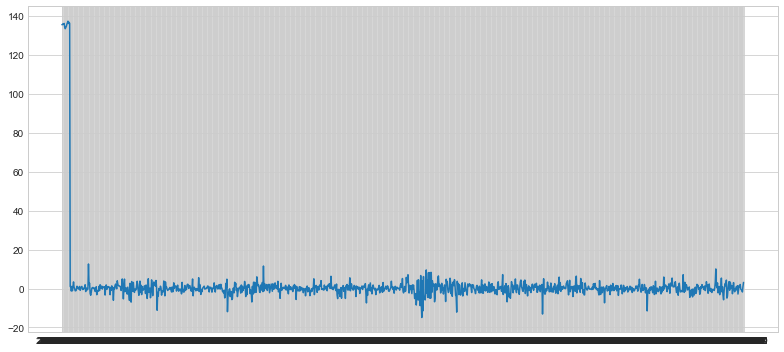

In [205]:
plt.plot(Sar_res)

In [217]:
Sar_res[14]

136.15716607691752

In [216]:
Sar_res[15]

1.005413378022297

# Recall that our SARIMA model used a window of size 15 so we should skip the first 15 observations for the model 

In [231]:
yskip = y_train['y'][15:]

In [232]:
yskip= yskip.reset_index()['y']
yskip

0       136.739960
1       137.743790
2       136.749527
3       137.495224
4       136.615677
           ...    
1212    142.800003
1213    141.860001
1214    140.710007
1215    141.190002
1216    141.119995
Name: y, Length: 1217, dtype: float64

In [236]:
sar_skip = Sar_res[15:]

In [238]:
sar_skip= sar_skip.reset_index()[0]
sar_skip

0       1.005413
1       1.096126
2      -1.306352
3       1.058597
4      -1.160720
          ...   
1212   -0.636902
1213   -0.904758
1214   -1.776852
1215    1.052007
1216    3.136776
Name: 0, Length: 1217, dtype: float64

In [245]:
X_res_train = make_res_training_data(yskip, sar_skip,  20)

In [246]:
residual_Lstm_model_20 = fit_LSTM_new(X_res_train, sar_skip, cell_units = 40, epochs = 100, valid_split = 0.2)

Epoch 1/100
973/973 [==============================] - 5s 4ms/step - loss: 6.4137 - val_loss: 4.5845
Epoch 2/100
973/973 [==============================] - 3s 3ms/step - loss: 7.4320 - val_loss: 4.5610
Epoch 3/100
973/973 [==============================] - 3s 4ms/step - loss: 5.9626 - val_loss: 4.5716
Epoch 4/100
973/973 [==============================] - 3s 3ms/step - loss: 6.2717 - val_loss: 4.6373
Epoch 5/100
973/973 [==============================] - 3s 3ms/step - loss: 6.0210 - val_loss: 4.5634
Epoch 6/100
973/973 [==============================] - 3s 3ms/step - loss: 6.8285 - val_loss: 4.5727
Epoch 7/100
973/973 [==============================] - 4s 4ms/step - loss: 7.1943 - val_loss: 4.5768
Epoch 8/100
973/973 [==============================] - 4s 4ms/step - loss: 6.3479 - val_loss: 4.5610
Epoch 9/100
973/973 [==============================] - 4s 4ms/step - loss: 6.6001 - val_loss: 4.5755
Epoch 10/100
973/973 [==============================] - 4s 4ms/step - loss: 7.8785 - val_lo

KeyboardInterrupt: 

# The model stopped learning and the MSE was equivalent to the MSE of the original model making this not useful. Lets use 2 lstm layers instead

In [249]:
def fit_double_LSTM_new(train_X, train_y, cell_units, epochs, valid_split):
    """
    Fit LSTM to data train_X, train_y where train_X consists of 2 paired time_series
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, return_sequences=True, input_shape=(train_X.shape[1],2)))
    model.add(LSTM(cell_units))
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=1, validation_split = valid_split)
    
    return model

In [252]:
residual_double_Lstm_model_20 = fit_double_LSTM_new(X_res_train, sar_skip, cell_units = 60, epochs = 100, valid_split = 0)

Epoch 1/100
1217/1217 [==============================] - 11s 7ms/step - loss: 5.9020
Epoch 2/100
1217/1217 [==============================] - 10s 8ms/step - loss: 7.0396
Epoch 3/100
1217/1217 [==============================] - 9s 8ms/step - loss: 6.8374
Epoch 4/100
1217/1217 [==============================] - 9s 8ms/step - loss: 5.6295
Epoch 5/100
1217/1217 [==============================] - 9s 8ms/step - loss: 6.9386
Epoch 6/100
1217/1217 [==============================] - 9s 8ms/step - loss: 5.9992
Epoch 7/100
1217/1217 [==============================] - 9s 8ms/step - loss: 5.5218
Epoch 8/100
1217/1217 [==============================] - 9s 8ms/step - loss: 5.8224
Epoch 9/100
1217/1217 [==============================] - 10s 8ms/step - loss: 5.6471
Epoch 10/100
1217/1217 [==============================] - 9s 8ms/step - loss: 5.9255
Epoch 11/100
1217/1217 [==============================] - 9s 8ms/step - loss: 5.9576
Epoch 12/100
1217/1217 [==============================] - 10s 8ms/step 

1217/1217 [==============================] - 9s 7ms/step - loss: 6.2459
Epoch 98/100
1217/1217 [==============================] - 8s 7ms/step - loss: 5.9072
Epoch 99/100
1217/1217 [==============================] - 9s 7ms/step - loss: 5.8771
Epoch 100/100
1217/1217 [==============================] - 8s 7ms/step - loss: 6.0332


# It doesn't look like the model was able to learn anything

In [255]:
res_preds = residual_double_Lstm_model_20.predict(X_res_train)

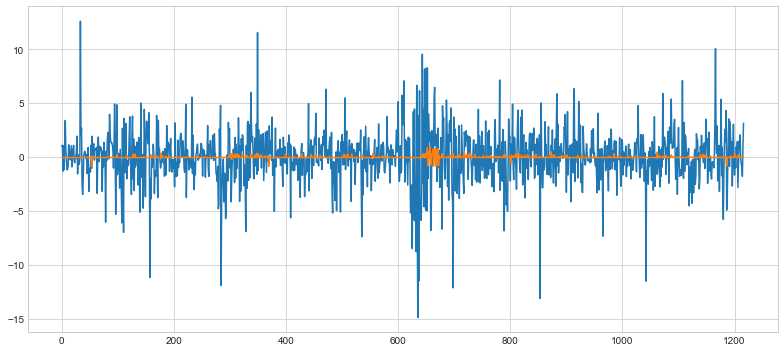

In [256]:
plt.plot(sar_skip)
plt.plot(res_preds)

In [257]:
res_preds.mean()

-0.014107405

In [258]:
res_preds.std()

0.12325788

# What if we just use the residual lags to model the data and not the lags of the closing value

In [259]:
X_res_train_only = make_training_data(sar_skip,  20)

In [261]:
residual_double_Lstm_model_20 = fit_double_LSTM(X_res_train_only, sar_skip, cell_units = 60, epochs = 100, valid_split = 0.2)

Epoch 1/100
973/973 [==============================] - 11s 9ms/step - loss: 5.7721 - val_loss: 4.5731
Epoch 2/100
973/973 [==============================] - 7s 7ms/step - loss: 7.4430 - val_loss: 4.5744
Epoch 3/100
973/973 [==============================] - 7s 7ms/step - loss: 7.2801 - val_loss: 4.5844
Epoch 4/100
973/973 [==============================] - 8s 8ms/step - loss: 6.5911 - val_loss: 4.5718
Epoch 5/100
973/973 [==============================] - 8s 8ms/step - loss: 6.2349 - val_loss: 4.5924
Epoch 6/100
973/973 [==============================] - 8s 8ms/step - loss: 6.5428 - val_loss: 4.6969
Epoch 7/100
973/973 [==============================] - 8s 8ms/step - loss: 6.6109 - val_loss: 4.5883
Epoch 8/100
973/973 [==============================] - 8s 8ms/step - loss: 6.6279 - val_loss: 4.5751
Epoch 9/100
973/973 [==============================] - 8s 8ms/step - loss: 6.0473 - val_loss: 4.5880
Epoch 10/100
973/973 [==============================] - 8s 8ms/step - loss: 6.2628 - val_l

973/973 [==============================] - 8s 8ms/step - loss: 0.1286 - val_loss: 7.7763
Epoch 82/100
973/973 [==============================] - 8s 8ms/step - loss: 0.1868 - val_loss: 7.5225
Epoch 83/100
973/973 [==============================] - 7s 7ms/step - loss: 0.2119 - val_loss: 7.7697
Epoch 84/100
973/973 [==============================] - 7s 8ms/step - loss: 0.1477 - val_loss: 7.5140
Epoch 85/100
973/973 [==============================] - 7s 7ms/step - loss: 0.1116 - val_loss: 7.4817
Epoch 86/100
973/973 [==============================] - 7s 8ms/step - loss: 0.1361 - val_loss: 7.1980
Epoch 87/100
973/973 [==============================] - 7s 7ms/step - loss: 0.1834 - val_loss: 7.2136
Epoch 88/100
973/973 [==============================] - 7s 7ms/step - loss: 0.1821 - val_loss: 7.8370
Epoch 89/100
973/973 [==============================] - 7s 7ms/step - loss: 0.2134 - val_loss: 7.6549
Epoch 90/100
973/973 [==============================] - 8s 8ms/step - loss: 0.0911 - val_loss: 

# The model was able to learn on the in sample data but not the out of sample, so I dont think this will be very useful

In [262]:
res_preds = residual_double_Lstm_model_20.predict(X_res_train_only)

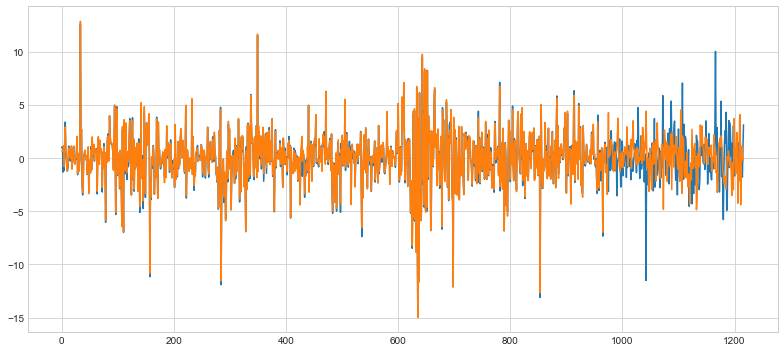

In [263]:
plt.plot(sar_skip)
plt.plot(res_preds)

# Now we can improve our SARIMA model predictions

In [275]:
Sar_preds = train_data['Sar_train'][15:].to_list()

# Our SARIMA model made predictions on the Closing price and the Residuals of these predictions were calculated as 
## res = true_price - predicted 

# Therefore if we add the predicted residuals to the predicted prices, then we will get closer to the true price

In [286]:
Sar_preds = np.array(Sar_preds)

In [284]:
res_preds = res_preds.reshape(1217)

In [287]:
Sar_with_LSTM_preds = Sar_preds + res_preds

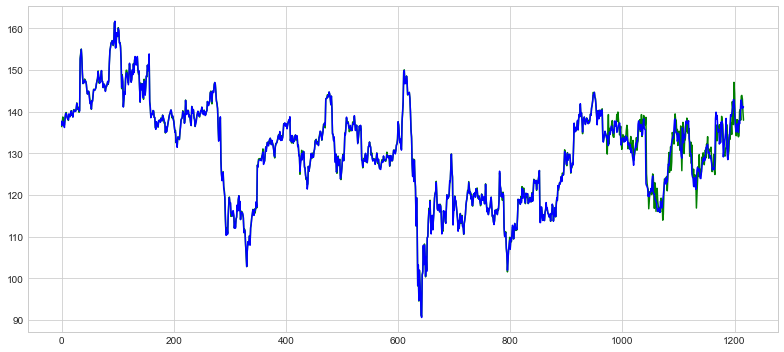

In [288]:
plt.plot(Sar_with_LSTM_preds, color = 'green')
plt.plot(yskip, color = 'blue')

# This looks really good, the plots are overlapping almost exactly

# Now we can try to forecast the future
## Recall that we already saved the SARIMA model forecast predictions in the test_data['Sar_preds']. These predictions will now be corrected for with the LSTM residuals model

In [290]:
Sar_forecast = test_data['Sar_preds']

In [291]:
Sar_forecast

Date
2022-07-01    139.512965
2022-07-05    137.285086
2022-07-06    138.476450
2022-07-07    139.373850
2022-07-08    140.767741
2022-07-11    140.700399
2022-07-12    142.805019
2022-07-13    141.078367
2022-07-14    139.565690
2022-07-15    141.309734
2022-07-18    142.515625
2022-07-19    142.930380
2022-07-20    142.945457
2022-07-21    143.516103
2022-07-22    140.398837
2022-07-25    137.999070
2022-07-26    136.427456
2022-07-27    137.857506
2022-07-28    139.431867
2022-07-29    139.479431
2022-08-01    140.055387
2022-08-02    142.410415
2022-08-03    141.391414
2022-08-04    141.537009
2022-08-05    143.456354
2022-08-08    144.356411
2022-08-09    144.702842
Name: Sar_preds, dtype: float64

# We now need to predict the residuals of this data, luckily my forecasting function should still work on the residuals data

In [292]:
residual_double_Lstm_model_20_future = forecast_prediction(X_res_train_only, sar_skip, n, residual_double_Lstm_model_20)

In [294]:
residual_double_Lstm_model_20_future

array([[-5.6190884e-01],
       [ 4.0741694e-01],
       [ 7.1412587e-01],
       [ 4.6734363e-01],
       [ 6.1166620e-01],
       [ 6.0153496e-01],
       [ 1.1520787e+00],
       [ 1.3466369e-01],
       [ 5.8058274e-01],
       [ 8.5704994e-01],
       [-4.6364620e-01],
       [ 2.2352779e+00],
       [ 2.7439377e-01],
       [ 7.1542132e-01],
       [-7.2305310e-01],
       [-1.8443987e-01],
       [-9.0506601e-01],
       [ 1.7610043e-03],
       [-2.4574332e-02],
       [-2.1003442e+00],
       [-3.2213092e-02],
       [ 1.6440005e+00],
       [-6.7478716e-01],
       [-8.1055772e-01],
       [ 1.0569551e+00],
       [ 8.6534810e-01],
       [ 1.3435913e+00]], dtype=float32)

In [297]:
ensemble_forecast = Sar_forecast+residual_double_Lstm_model_20_future.reshape(n)

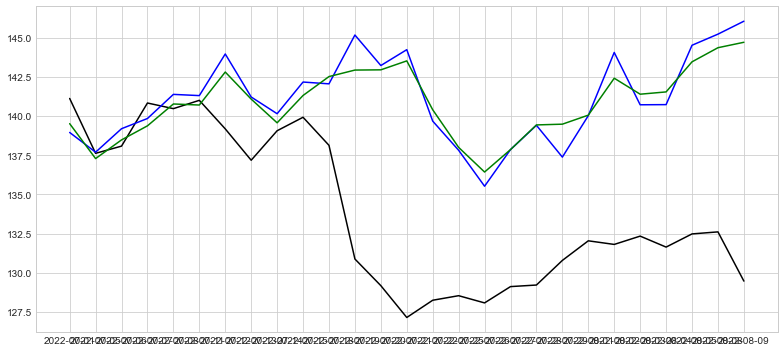

In [299]:
plt.plot(test_data['Close'], color = 'black')
plt.plot(ensemble_forecast, color = 'blue')
plt.plot(Sar_forecast, color = 'green')

In [300]:
residual_double_Lstm_model_20_retry = fit_double_LSTM(X_res_train_only, sar_skip, cell_units = 60, epochs = 100, valid_split = 0.1)

Epoch 1/100
1095/1095 [==============================] - 10s 7ms/step - loss: 5.6926 - val_loss: 5.2996
Epoch 2/100
1095/1095 [==============================] - 8s 8ms/step - loss: 5.3707 - val_loss: 5.3900
Epoch 3/100
1095/1095 [==============================] - 8s 7ms/step - loss: 6.0863 - val_loss: 5.3086
Epoch 4/100
1095/1095 [==============================] - 9s 8ms/step - loss: 5.7149 - val_loss: 5.3712
Epoch 5/100
1095/1095 [==============================] - 8s 8ms/step - loss: 5.7945 - val_loss: 5.2667
Epoch 6/100
1095/1095 [==============================] - 9s 8ms/step - loss: 6.0902 - val_loss: 5.2930
Epoch 7/100
1095/1095 [==============================] - 8s 8ms/step - loss: 6.7580 - val_loss: 5.2927
Epoch 8/100
1095/1095 [==============================] - 9s 8ms/step - loss: 5.7009 - val_loss: 5.2510
Epoch 9/100
1095/1095 [==============================] - 9s 8ms/step - loss: 7.0621 - val_loss: 5.2641
Epoch 10/100
1095/1095 [==============================] - 9s 8ms/step - 

Epoch 80/100
1095/1095 [==============================] - 9s 8ms/step - loss: 0.3189 - val_loss: 6.9773
Epoch 81/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.2953 - val_loss: 7.0067
Epoch 82/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.3390 - val_loss: 6.6809
Epoch 83/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.4669 - val_loss: 5.9288
Epoch 84/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.3746 - val_loss: 6.7502
Epoch 85/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.3140 - val_loss: 6.5928
Epoch 86/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.1927 - val_loss: 6.7102
Epoch 87/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.2268 - val_loss: 7.6520
Epoch 88/100
1095/1095 [==============================] - 8s 7ms/step - loss: 0.8634 - val_loss: 7.0464
Epoch 89/100
1095/1095 [==============================] - 8s 7ms

In [301]:
new_res_preds = residual_double_Lstm_model_20_retry.predict(X_res_train_only)

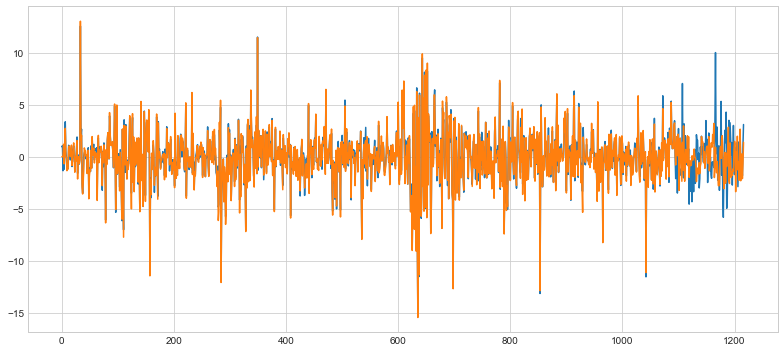

In [302]:
plt.plot(sar_skip)
plt.plot(new_res_preds)

In [303]:
Sar_with_LSTM_preds_new = Sar_preds + new_res_preds.reshape(1217)

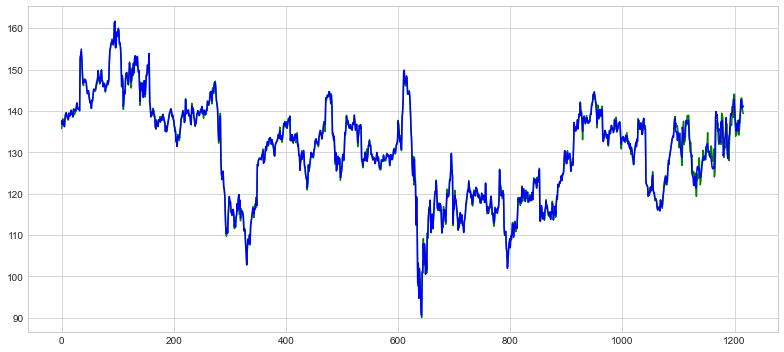

In [304]:
plt.plot(Sar_with_LSTM_preds_new, color = 'green')
plt.plot(yskip, color = 'blue')

In [305]:
new_residual_double_Lstm_model_20_future = forecast_prediction(X_res_train_only, sar_skip, n, residual_double_Lstm_model_20_retry)

In [306]:
new_ensemble_forecast = Sar_forecast+new_residual_double_Lstm_model_20_future.reshape(n)

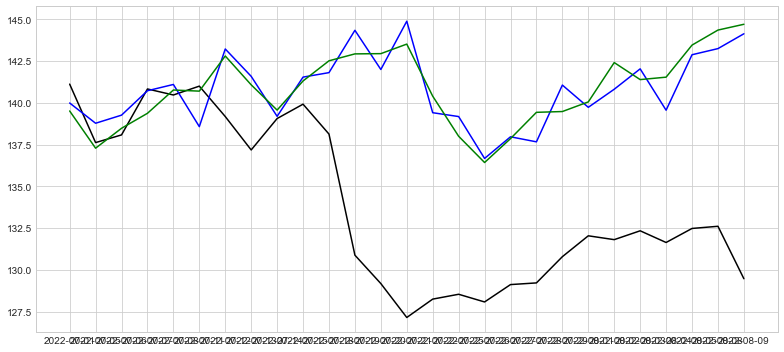

In [307]:
plt.plot(test_data['Close'], color = 'black')
plt.plot(new_ensemble_forecast, color = 'blue')
plt.plot(Sar_forecast, color = 'green')

# I tried using less validation data, but this doesnt seem to have changed anything. This Ensemble method seems to have improved the model slightly in the first 10 days but provides no improvement towards the second half of the month being predicted

In [308]:
mean_squared_error(ensemble_forecast[:10], test_data['Close'][:10])

5.315301155422033

In [309]:
mean_squared_error(new_ensemble_forecast[:10], test_data['Close'][:10])

4.87258327695773

In [310]:
mean_squared_error(Sar_forecast[:10], test_data['Close'][:10])

3.5675890341409278

# The ensemble method is worse than the original SARIMA model in the first 10 days

In [313]:
mean_squared_error(ensemble_forecast, test_data['Close'])

81.55788662990228

In [312]:
mean_squared_error(new_ensemble_forecast, test_data['Close'])

74.8984092523441

In [314]:
mean_squared_error(Sar_forecast, test_data['Close'])

76.56784120285738

## The original SARIMA model is better at forecasting in the first 10 days, but the ensemble with smaller validation set is better at forecasting the entire month

In [315]:
mean_squared_error(test_data['Close'], double_lstm_20_future)

11.452634924691926

In [316]:
mean_squared_error(test_data['Close'][:10], double_lstm_20_future[:10])

4.869502071840495

# The Double LSTM Model using 20 lagged series for prediction is the strongest model by far over the entire month but the SARIMA model is stronger in the first 10 days

# What about in the first 5 days

In [319]:
mean_squared_error(test_data['Close'][:5], double_lstm_20_future[:5])

3.137020720538342

In [318]:
mean_squared_error(Sar_forecast[:5], test_data['Close'][:5])

1.0121815756817072

In [321]:
mean_squared_error(ensemble_forecast[:5], test_data['Close'][:5])

1.5495375140877496

## The SARIMA model by itself has the strongest prediction strength on the first week (5 days) for forecasting as well as the second week (10 days) while the Double LSTM with 20 lags and 40 cell units model is relatively accurate but maintains its strength over the course of the month while the other models drop off in strength considerably

In [338]:
mean_squared_error(train_data['Close'][15:], Sar_preds)

6.093046999563773

In [342]:
mean_squared_error(double_lstm_preds_20, y_train)

10.275192966717093

# FINAL MODEL SELECTION

# For the final model, I would recommend keeping both the SARIMA model for short term predictions and the Double LSTM with 20 lags and 40 cell units for accurate predictions of future monthly trends. We also can easily interpret the SARIMA model to allow for investors to understand the reasoning behind predictions.

# KEY FINDINGS

# The IBM Stock Closing Price is strongly Auto Regressive with the majority of behavior explained by the previous time step. We saw by the PCAF plots that the 1st lag (1 timestep back) is enough to explain the auto regressive behavior of the stock price.

# We found that seasonality exists in the data and a SARIMA model using the parameters (p=1, d=0, q=0)(P=2, D=1, Q=0)[M=15] can produce a linear model with an MSE of 6.09304 on the training data and a forecasting error of 1.012 in a time horizon of 1 week.

# LSTM models have the strongest preformance over longer time horizons, but we are not able to understand why ther model is predicting what it does beyond knowing how many lagged observations are being used in the predictions

# LSTM and RNN models can get stuck predicting the mean of a time series if they do not have enough cell units or not enough layers to capture more nuainced features in the data.

# LSTM models cannot predict outside the range of the training data so they will only asypmtotically head to the max or min of the training data in prediction forecasts if they predict growth or loss not seen in the training data

# LSTM models will get weaker for predictions if the series they are trained on are too long (ie contain to many lagged features)

# NEXT STEPS

# We can improve our model in two ways:

# 1. Look at other time series data, specifically other stocks or sales reports for IBM to allow the model to learn other reasons for the lost beyond just predicting by looking at the past of the close price itself. We could join such data with a SARIMA model with a similar ensemble method seen above where a second model uses the predictions of the sarima model and the other data to make a regression on the current time step of the closing price.

# 2. Make a second model trained on the standard deviation time series to predict when we should expect to see an extreme event. Such events would make our current predictions inaccurate and would inform us that maybe this model is insufficient to predict the future at that time.